In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import contextily as cx # Library to fetch basemaps
import geopandas as gpd # Library for geographic data structures

Loading of the datasets into separate dataframes, the dataframes will later be joined in order to get a single dataframe containing all the information regarding both the tracks and the aritsts performing them. We also print the head of each dataframe to get an initial idea about the different attributes and how they are populated

In [2]:
artists = 'dataset/artists.csv'
tracks = 'dataset/tracks.csv'

index_col = 0
df_artists = pd.read_csv(artists, sep=';', index_col=index_col)
df_tracks = pd.read_csv(tracks, index_col=index_col)

pd.set_option('display.max_columns', None)

In [3]:
df_artists.head(10)

name gender  birth_date birth_place nationality  \
id_author                                                               
ART82291002       99 posse      M         NaN         NaN         NaN   
ART53496045  achille lauro      M  1990-07-11      Verona      Italia   
ART18853907           alfa      M         NaN         NaN         NaN   
ART64265460      anna pepe      F         NaN         NaN         NaN   
ART75741740    articolo 31      M         NaN         NaN         NaN   
ART24123617        babaman      M  1975-08-08         Rho      Italia   
ART40229749         baby k      F  1983-02-05   Singapore      Italia   
ART56320683  bassi maestro      M  1973-08-03      Milano      Italia   
ART19605256           beba      F         NaN         NaN         NaN   
ART02666525        bigmama      F         NaN         NaN         NaN   

                                                   description active_start  \
id_author                                                                     
ART82291002                           gruppo musicale italiano   1991-01-01   
ART53496045               cantautore e rapper italiano (1990-)   2012-01-01   
ART18853907                                                NaN          NaN   
ART64265460                                                NaN          NaN   
ART75741740                   gruppo musicale hip hop italiano   1990-01-01   
ART24123617                                  cantante italiano          NaN   
ART40229749              cantautrice e rapper italiana (1983-)   2007-01-01   
ART56320683  rapper, disc jockey, beatmaker e produttore di...   1988-01-01   
ART19605256                                            cognome          NaN   
ART02666525                                                NaN   2001-01-01   

             active_end province     region country   latitude  longitude  
id_author                                                                  
ART82291002         NaN      NaN        NaN     NaN        NaN        NaN  
ART53496045         NaN   Verona     Veneto  Italia  45.442498  10.985738  
ART18853907         NaN      NaN        NaN     NaN        NaN        NaN  
ART64265460         NaN      NaN        NaN     NaN        NaN        NaN  
ART75741740         NaN      NaN        NaN     NaN        NaN        NaN  
ART24123617         NaN   Milano  Lombardia  Italia  45.528878   9.041560  
ART40229749         NaN      NaN        NaN     NaN  45.080627   7.670717  
ART56320683         NaN   Milano  Lombardia  Italia  45.464194   9.189635  
ART19605256         NaN      NaN        NaN     NaN        NaN        NaN  
ART02666525         NaN      NaN        NaN     NaN        NaN        NaN

In [4]:
df_tracks.head(10)

id_artist    name_artist  \
id                                     
TR934808  ART04205421  Rosa Chemical   
TR760029  ART04205421  Rosa Chemical   
TR916821  ART04205421  Rosa Chemical   
TR480968  ART04205421  Rosa Chemical   
TR585039  ART04205421  Rosa Chemical   
TR550335  ART04205421  Rosa Chemical   
TR170793  ART04205421  Rosa Chemical   
TR627195  ART04205421  Rosa Chemical   
TR628871  ART04205421  Rosa Chemical   
TR700756  ART04205421  Rosa Chemical   

                                                 full_title          title  \
id                                                                           
TR934808    ​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè)   ​polka 2 :-/   
TR760029         POLKA by Rosa Chemical (Ft. Thelonious B.)          POLKA   
TR916821  ​britney ;-) by Rosa Chemical (Ft. MamboLosco ...   ​britney ;-)   
TR480968                  CEO by Rosa Chemical (Ft. Taxi B)            CEO   
TR585039                LONDRA by Rosa Chemical (Ft. Rkomi)         LONDRA   
TR550335                            BOHEME by Rosa Chemical         BOHEME   
TR170793                         LOBBY WAY by Rosa Chemical      LOBBY WAY   
TR627195             SLATT by Rosa Chemical (Ft. Dani Faiv)          SLATT   
TR628871                     MADE IN ITALY by Rosa Chemical  MADE IN ITALY   
TR700756                       ROSE & ROVI by Rosa Chemical    ROSE & ROVI   

             featured_artists primary_artist language  \
id                                                      
TR934808           Ernia, Guè  Rosa Chemical       pl   
TR760029        Thelonious B.  Rosa Chemical       en   
TR916821  MamboLosco, RADICAL  Rosa Chemical       en   
TR480968               Taxi B  Rosa Chemical       it   
TR585039                Rkomi  Rosa Chemical       en   
TR550335                  NaN  Rosa Chemical       it   
TR170793                  NaN  Rosa Chemical       it   
TR627195            Dani Faiv  Rosa Chemical       en   
TR628871                  NaN  Rosa Chemical       it   
TR700756                  NaN  Rosa Chemical       it   

                              album  stats_pageviews  swear_IT  swear_EN  \
id                                                                         
TR934808           FOREVER AND EVER         196033.0        13         6   
TR760029           FOREVER AND EVER         164450.0         9        12   
TR916821           FOREVER AND EVER          58313.0        16        12   
TR480968          OKAY OKAY !! - EP          39890.0         8         3   
TR585039           FOREVER AND EVER          35432.0         1         0   
TR550335           FOREVER AND EVER          34443.0         2         0   
TR170793           FOREVER AND EVER          29265.0         5         2   
TR627195           FOREVER AND EVER          26902.0         7        13   
TR628871   Festival di Sanremo 2023          19724.0         0         2   
TR700756           FOREVER AND EVER          19148.0         4         5   

                                             swear_IT_words  \
id                                                            
TR934808  ['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...   
TR760029  ['cazzo', 'culo', 'frocio', 'puttana', 'sega',...   
TR916821    ['bastardo', 'cazzo', 'culo', 'merda', 'troia']   
TR480968  ['cazzo', 'culo', 'fottere', 'merda', 'pompino...   
TR585039                                          ['cazzo']   
TR550335                                          ['cazzo']   
TR170793                      ['cazzo', 'cesso', 'scopare']   
TR627195                                  ['cazzo', 'figo']   
TR628871                                                 []   
TR700756                                        ['scopare']   

                                            swear_EN_words    year  month  \
id                                                                          
TR934808               ['bitch', 'fuck', 'porno', 'pussy']  2021.0    4.0   
TR760029

Checking the info and non-null values for each attribute for all records in both datasets.
The initial assessment of both the df_tracks and df_artists datasets, performed by examining attribute information and non-null value counts, immediately revealed a significant proportion of missing data. 

Several attributes exhibit high degrees of incompleteness; for example, the stats_pageviews column in df_tracks is nearly 60% null, and the df_artists dataframe contains multiple fields with similarly high null percentages, including the entirely empty active_end attribute. 

Our data cleaning strategy will prioritize a sensible imputation of these missing values where possible. The complete removal of a column will be reserved as a last resort, used only when high null cardinality prevents meaningful imputation and the attribute risks introducing noise or bias into the analysis.

In [5]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, TR934808 to TR552777
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_artist             11166 non-null  object 
 1   name_artist           11166 non-null  object 
 2   full_title            11166 non-null  object 
 3   title                 11166 non-null  object 
 4   featured_artists      3517 non-null   object 
 5   primary_artist        11166 non-null  object 
 6   language              11061 non-null  object 
 7   album                 9652 non-null   object 
 8   stats_pageviews       4642 non-null   float64
 9   swear_IT              11166 non-null  int64  
 10  swear_EN              11166 non-null  int64  
 11  swear_IT_words        11166 non-null  object 
 12  swear_EN_words        11166 non-null  object 
 13  year                  10766 non-null  object 
 14  month                 9969 non-null   float64
 15  day           

In [6]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          104 non-null    object 
 1   gender        104 non-null    object 
 2   birth_date    73 non-null     object 
 3   birth_place   72 non-null     object 
 4   nationality   71 non-null     object 
 5   description   86 non-null     object 
 6   active_start  50 non-null     object 
 7   active_end    0 non-null      float64
 8   province      70 non-null     object 
 9   region        68 non-null     object 
 10  country       70 non-null     object 
 11  latitude      72 non-null     float64
 12  longitude     72 non-null     float64
dtypes: float64(3), object(10)
memory usage: 11.4+ KB


The initial inspection revealed that a majority of the attributes across both dataframes were automatically assigned the generic object data type. This misclassification is likely a consequence of type heterogeneity within the columns, often caused by the presence of missing values (e.g., NumPy's NaN), erroneous non-numeric entries, or mixed data formats.

Before proceeding with imputation or feature engineering, a preliminary data cleaning phase is necessary. We will systematically enforce type consistency by casting attributes to their appropriate data types based on their underlying semantics (e.g., converting strings representing dates to datetime, or numeric strings to float or int). This step is foundational, as correct data types are essential for accurate analysis, proper handling of missing values, and efficient memory usage.

---

In [7]:
df_artists['gender'] = df_artists['gender'].astype('category')
df_artists['nationality'] = df_artists['nationality'].astype('category')
df_artists['country'] = df_artists['country'].astype('category')
df_artists['region'] = df_artists['region'].astype('category')
df_artists['province'] = df_artists['province'].astype('category')
df_artists['birth_place'] = df_artists['birth_place'].astype('category')
df_artists['birth_date'] = pd.to_datetime(df_artists['birth_date'], errors='coerce')
df_artists['active_start'] = pd.to_datetime(df_artists['active_start'], errors='coerce')
df_artists['description'] = df_artists['description'].astype('string')
df_artists['name'] = df_artists['name'].astype('string')

In [10]:
df_tracks['id_artist'] = df_tracks['id_artist'].astype('category')
df_tracks['id_album'] = df_tracks['id_album'].astype('category')
df_tracks['language'] = df_tracks['language'].astype('category')
df_tracks['album_type'] = df_tracks['album_type'].astype('category')
df_tracks['stats_pageviews'] = df_tracks['stats_pageviews'].astype('Int64')
df_tracks['year'] = df_tracks['year'].astype('Int64')
df_tracks['month'] = df_tracks['month'].astype('Int64')
df_tracks['day'] = df_tracks['day'].astype('Int64')
df_tracks['popularity'] = df_tracks['popularity'].astype('Int64')
df_tracks['disc_number'] = df_tracks['disc_number'].astype('Int64')
df_tracks['track_number'] = df_tracks['track_number'].astype('Int64')
df_tracks['explicit'] = df_tracks['explicit'].astype('bool')
df_tracks['modified_popularity'] = df_tracks['modified_popularity'].astype('bool')
df_tracks['album_release_date'] = pd.to_datetime(df_tracks['album_release_date'], errors='coerce')
df_tracks['name_artist'] = df_tracks['name_artist'].astype('string')
df_tracks['full_title'] = df_tracks['full_title'].astype('string')
df_tracks['title'] = df_tracks['title'].astype('string')
df_tracks['featured_artists'] = df_tracks['featured_artists'].astype('string')
df_tracks['primary_artist'] = df_tracks['primary_artist'].astype('string')
df_tracks['album_name'] = df_tracks['album_name'].astype('string')
df_tracks['album'] = df_tracks['album'].astype('string')
df_tracks['album_image'] = df_tracks['album_image'].astype('string')
df_tracks['lyrics'] = df_tracks['lyrics'].astype('string')

In [14]:
import ast # Import the Abstract Syntax Tree module for safe evaluation

# Assuming your DataFrame is df_tracks and it's already loaded

def safe_literal_eval(value):
    """
    Safely converts a string representation of a list into a Python list.
    Handles NaN/missing values by returning an empty list or pd.NA.
    """
    if pd.isna(value) or value in (None, 'NaN', ''):
        # Return an empty list for missing values if you plan to iterate over it
        return []
    try:
        # Use ast.literal_eval for safe conversion of string-to-list
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # Handle cases where the string is malformed or not a list structure
        print(f"Warning: Could not convert value: {value}")
        return [] # Default to empty list on failure

# Apply the conversion to both columns
df_tracks['swear_IT_words'] = df_tracks['swear_IT_words'].apply(safe_literal_eval)
df_tracks['swear_EN_words'] = df_tracks['swear_EN_words'].apply(safe_literal_eval)

In [11]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          104 non-null    string        
 1   gender        104 non-null    category      
 2   birth_date    72 non-null     datetime64[ns]
 3   birth_place   72 non-null     category      
 4   nationality   71 non-null     category      
 5   description   86 non-null     string        
 6   active_start  50 non-null     datetime64[ns]
 7   active_end    0 non-null      float64       
 8   province      70 non-null     category      
 9   region        68 non-null     category      
 10  country       70 non-null     category      
 11  latitude      72 non-null     float64       
 12  longitude     72 non-null     float64       
dtypes: category(6), datetime64[ns](2), float64(3), string(2)
memory usage: 10.7+ KB


In [13]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, TR934808 to TR552777
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_artist             11166 non-null  category      
 1   name_artist           11166 non-null  string        
 2   full_title            11166 non-null  string        
 3   title                 11166 non-null  string        
 4   featured_artists      3517 non-null   string        
 5   primary_artist        11166 non-null  string        
 6   language              11061 non-null  category      
 7   album                 9652 non-null   string        
 8   stats_pageviews       4642 non-null   float64       
 9   swear_IT              11166 non-null  int64         
 10  swear_EN              11166 non-null  int64         
 11  swear_IT_words        11166 non-null  object        
 12  swear_EN_words        11166 non-null  object        
 13  year       

In [14]:
df_artists.describe()

birth_date         active_start  active_end   latitude  \
count                   72                   50         0.0  72.000000   
mean   1987-06-11 17:20:00  2003-04-27 22:33:36         NaN  43.591374   
min    1967-10-07 00:00:00  1988-01-01 00:00:00         NaN  37.747452   
25%    1980-08-24 12:00:00  1996-01-01 00:00:00         NaN  41.577547   
50%    1989-03-12 12:00:00  2004-01-01 00:00:00         NaN  45.067755   
75%    1993-12-20 18:00:00  2011-01-01 00:00:00         NaN  45.464194   
max    2002-04-29 00:00:00  2018-01-01 00:00:00         NaN  45.806691   
std                    NaN                  NaN         NaN   2.248674   

       longitude  
count  72.000000  
mean   11.060876  
min     7.525403  
25%     9.189635  
50%     9.917118  
75%    12.482932  
max    18.225226  
std     2.591871

In [15]:
df_tracks.describe()

stats_pageviews      swear_IT      swear_EN          year        month  \
count     4.642000e+03  11166.000000  11166.000000  10728.000000  9969.000000   
mean      3.699365e+04      2.343006      0.711177   2012.651286     6.198515   
min       5.006000e+03      0.000000      0.000000   1900.000000     1.000000   
25%       9.642250e+03      0.000000      0.000000   2009.000000     3.000000   
50%       1.909950e+04      1.000000      0.000000   2016.000000     6.000000   
75%       4.201175e+04      3.000000      0.000000   2021.000000    10.000000   
max       1.971207e+06     72.000000     72.000000   2100.000000    12.000000   
std       5.840656e+04      3.704831      2.555423     33.288337     3.482992   

               day   n_sentences      n_tokens  tokens_per_sent  char_per_tok  \
count  9843.000000  11090.000000  11090.000000     11090.000000  11090.000000   
mean     15.808697     59.399639    496.891253         8.672152      4.054416   
min       1.000000      1.000000      3.000000         1.500000      2.000000   
25%       9.000000     46.000000    372.000000         7.333333      3.866946   
50%      16.000000     58.000000    491.000000         8.404762      4.012709   
75%      23.000000     73.000000    615.000000         9.431527      4.168686   
max      31.000000    437.000000   3089.000000       400.000000     12.000000   
std       8.881989     24.711996    209.187612         5.675602      0.445958   

       lexical_density  avg_token_per_clause           bpm      centroid  \
count     11090.000000          11090.000000  11102.000000  11102.000000   
mean          0.514367              8.002009    114.134841      0.137474   
min           0.000000              0.000000     59.970000      0.000000   
25%           0.482353              5.859020     91.910000      0.119200   
50%           0.511719              6.764171    106.975000      0.137200   
75%           0.542450              8.090909    134.650000      0.155100   
max           1.000000            660.000000    738.270000      0.298200   
std           0.061583             14.577876     26.827124      0.028131   

            rolloff          flux           rms           zcr      flatness  \
count  11102.000000  11102.000000  11102.000000  11102.000000  11102.000000   
mean    1616.965767      1.258893      0.223965      0.063322      0.859986   
min        0.000000      0.000000      0.000000      0.000000      0.109400   
25%     1222.457200      1.172025      0.186225      0.051000      0.841400   
50%     1551.018550      1.257100      0.229700      0.061700      0.882450   
75%     1935.570650      1.346875      0.267600      0.074100      0.913075   
max     8635.954200      1.928500      0.621900      0.268300      1.000000   
std      567.646409      0.137123      0.064592      0.017972      0.109106   

       spectral_complexity         pitch      loudness  \
count         11102.000000  11102.000000  11102.000000   
mean             27.410247   2256.028782     24.226955   
min               0.000000      0.000000      0.000000   
25%              21.881750   2003.341325     18.779500   
50%              27.330850   2241.157450     24.666850   
75%              32.978475   2493.492250     30.010175   
max              61.222500   3993.020300     81.947800   
std               8.441590    382.134853      8.648780   

                  album_release_date  disc_number  track_number   duration_ms  \
count                          10827      11088.0       11088.0  1.108800e+04   
mean   2017-03-13 16:42:25.635910144     1.016685      6.859127  2.035293e+05   
min              1962-04-10 00:00:00          1.0           1.0  1.142600e+04   
25%              2013-12-11 00:00:00          1.0           2.0  1.701310e+05   
50%              2018-09-07 00:00:00          1.0           6.0  1.966725e+05   
75%              2022-05-18 00:00:00          1.0          10.0  2.271840e+05   
max              2025-06-18 00:00:00          5.0          5

With data types successfully standardized, the next crucial step involves generating histograms and density plots for all continuous and discrete numerical features, to gain foundational insight into the data's central tendency, spread, and the presence of potential outliers.

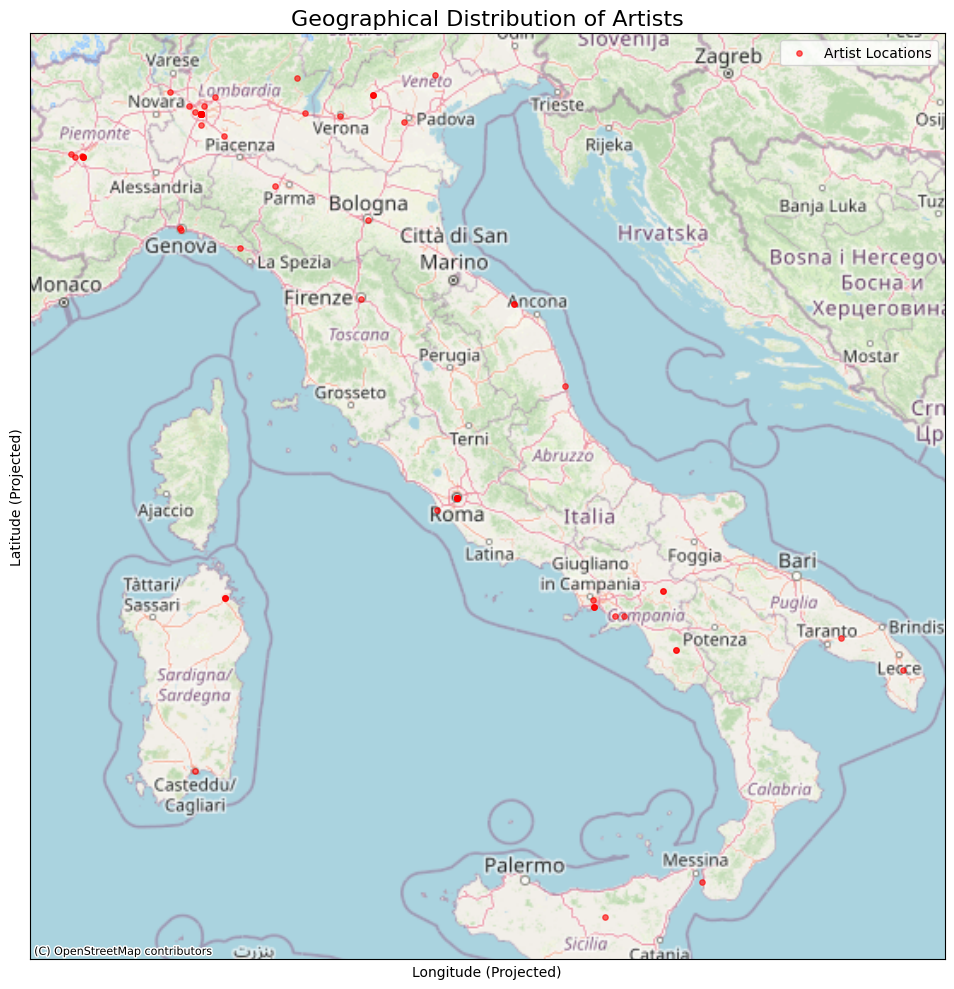

In [13]:
# --- 1. Create a GeoDataFrame ---
# GeoPandas is built on top of Pandas and uses shapely for geometry.
# We convert the regular DataFrame to a GeoDataFrame.
try:
    # Filter out any rows where coordinates are missing
    geo_df = pd.DataFrame({
        'latitude': df_artists['latitude'],
        'longitude': df_artists['longitude']
    }).dropna()

    if geo_df.empty:
        print("Error: Latitude or longitude columns are missing or entirely null. Cannot create map.")
    else:
        # Create a geometry column from the latitude and longitude columns
        # This is the crucial step for spatial visualization
        gdf = gpd.GeoDataFrame(
            geo_df, 
            geometry=gpd.points_from_xy(geo_df.longitude, geo_df.latitude),
            crs="EPSG:4326" # Standard coordinate system for Lat/Lon
        )
        
        # --- 2. Plotting the Data on a Map ---
        
        # Reproject to Web Mercator (EPSG:3857) for compatibility with contextily basemaps
        gdf_proj = gdf.to_crs(epsg=3857)

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        # Plot the points (the actual data)
        gdf_proj.plot(
            ax=ax, 
            marker='o', 
            color='red', 
            markersize=15, 
            alpha=0.6,
            label='Artist Locations'
        )
        
        # Add a basemap layer using contextily (this makes it look like a map)
        cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
        
        # Set titles and labels
        ax.set_title("Geographical Distribution of Artists", fontsize=16)
        ax.set_xlabel("Longitude (Projected)")
        ax.set_ylabel("Latitude (Projected)")
        
        # Remove tick labels (since basemaps provide context)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

        plt.legend()
        plt.tight_layout()
        plt.show()

except KeyError:
    print("Error: Please verify that 'latitude' and 'longitude' columns exist in your DataFrame (df_artists or df_tracks).")


---------------------------------------------------------------------------------------------------------------------------------

plotting the distribution for attribute: id_artist, else branch (Categorical)


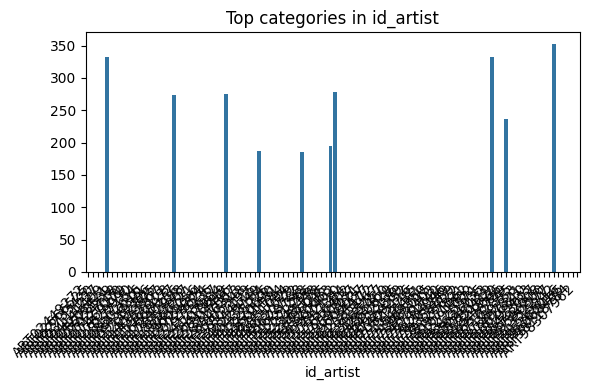

plotting the distribution for attribute: name_artist, else branch (Categorical)


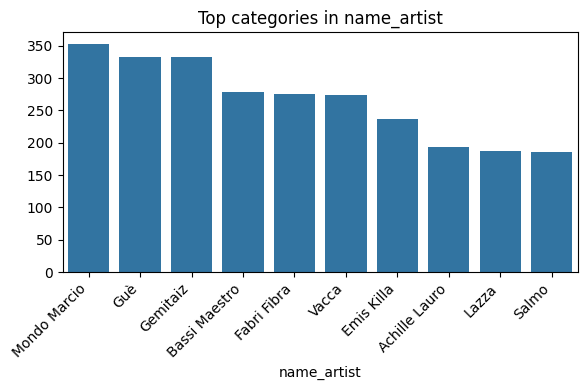

plotting the distribution for attribute: full_title, else branch (Categorical)


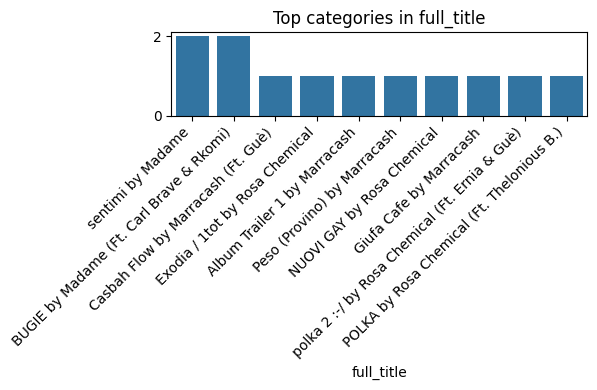

plotting the distribution for attribute: title, else branch (Categorical)


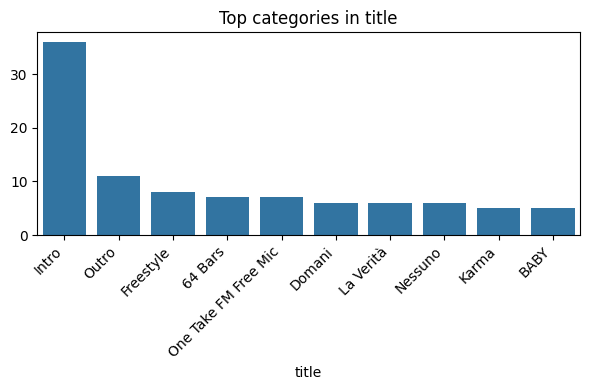

plotting the distribution for attribute: featured_artists, else branch (Categorical)


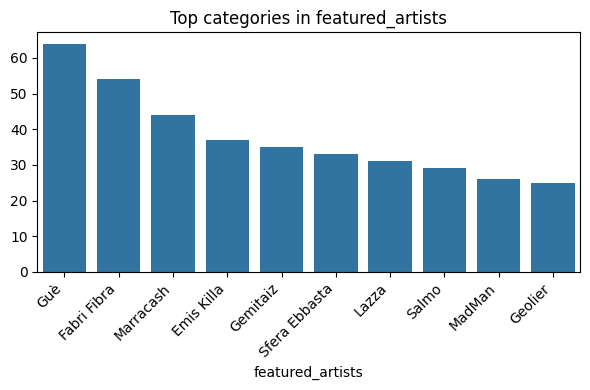

plotting the distribution for attribute: primary_artist, else branch (Categorical)


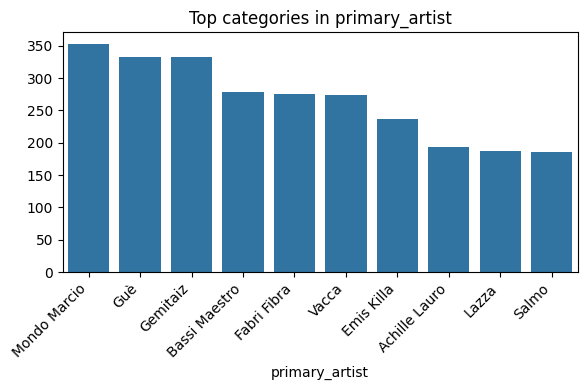

plotting the distribution for attribute: language, else branch (Categorical)


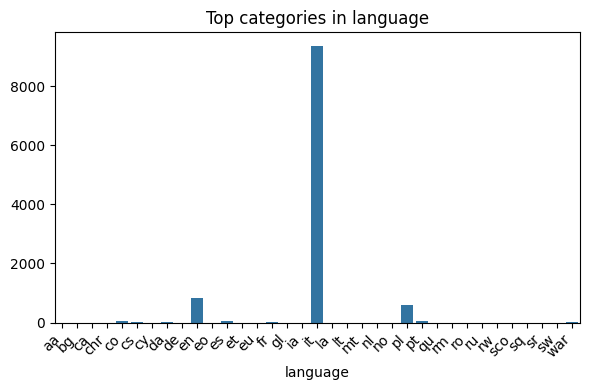

plotting the distribution for attribute: album, else branch (Categorical)


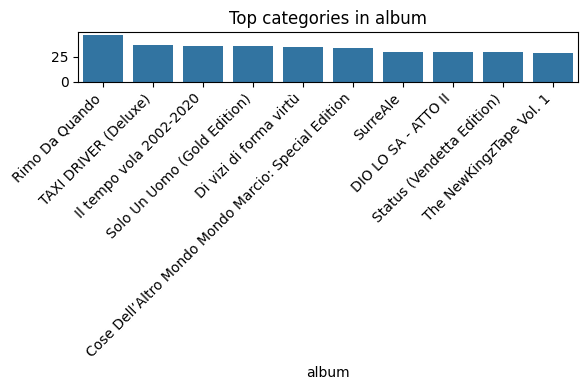

plotting the distribution for attribute: stats_pageviews, if branch (Numerical)


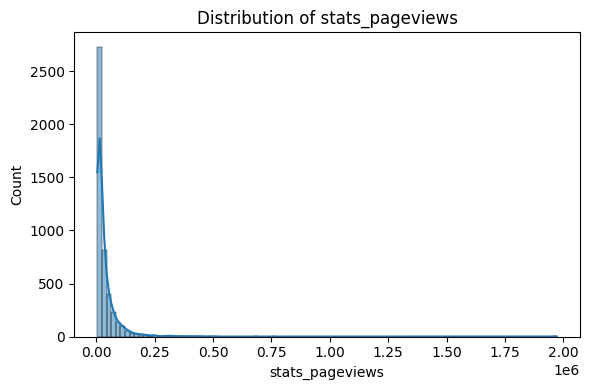

plotting the distribution for attribute: swear_IT, if branch (Numerical)


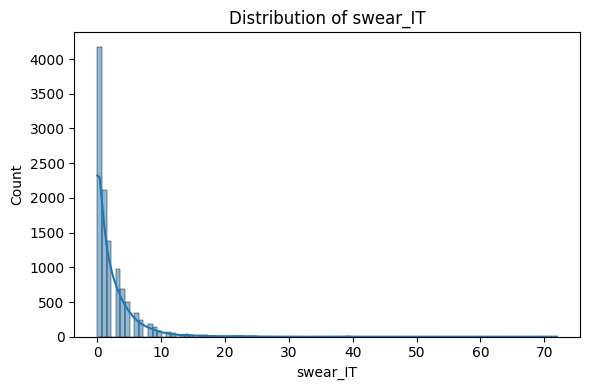

plotting the distribution for attribute: swear_EN, if branch (Numerical)


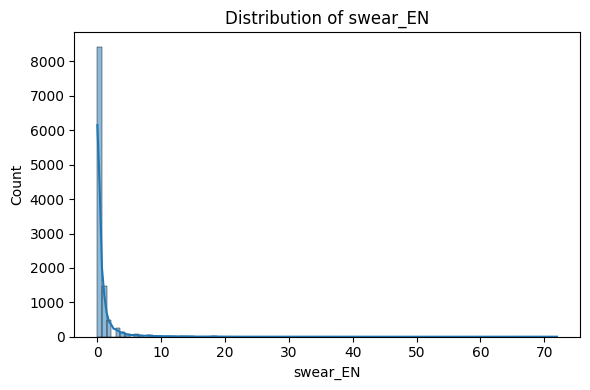

plotting the distribution for attribute: swear_IT_words, else branch (Categorical)
Skipping plot for swear_IT_words: Column contains unhashable types (e.g., Python lists).


<Figure size 600x400 with 0 Axes>

plotting the distribution for attribute: swear_EN_words, else branch (Categorical)
Skipping plot for swear_EN_words: Column contains unhashable types (e.g., Python lists).


<Figure size 600x400 with 0 Axes>

plotting the distribution for attribute: year, if branch (Numerical)


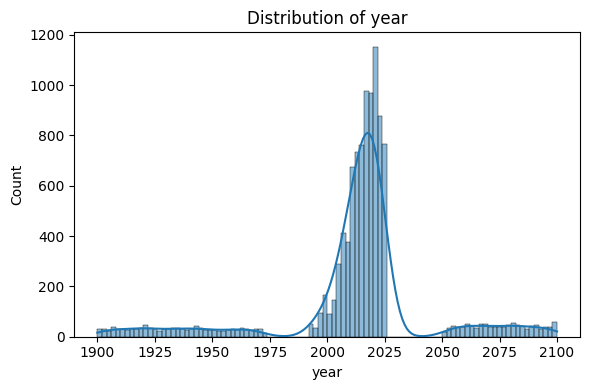

plotting the distribution for attribute: month, if branch (Numerical)


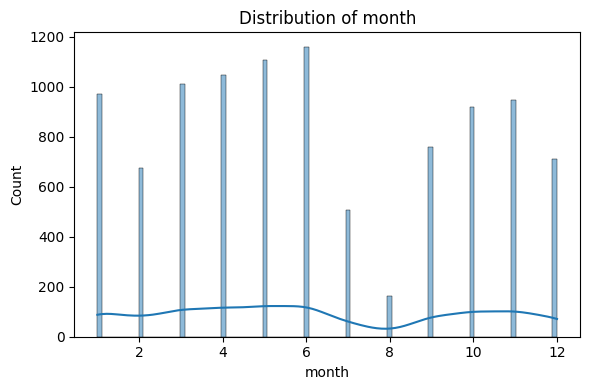

plotting the distribution for attribute: day, if branch (Numerical)


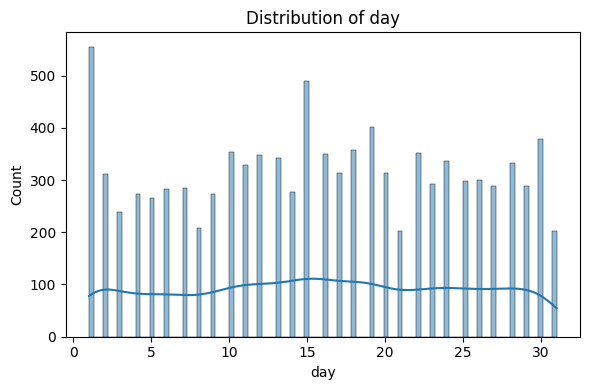

plotting the distribution for attribute: n_sentences, if branch (Numerical)


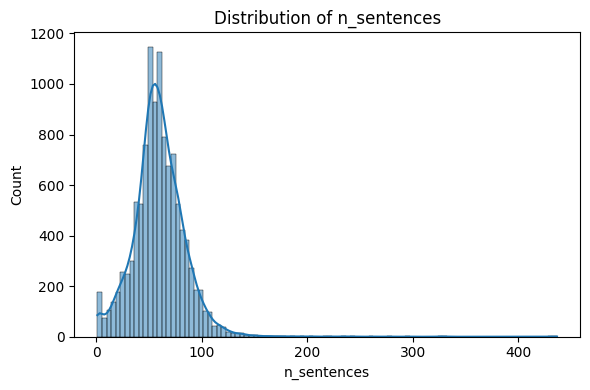

plotting the distribution for attribute: n_tokens, if branch (Numerical)


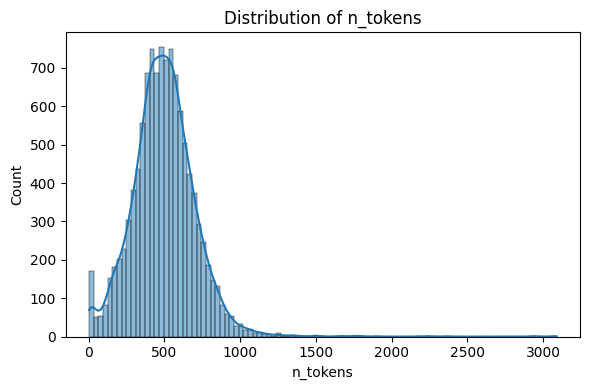

plotting the distribution for attribute: tokens_per_sent, if branch (Numerical)


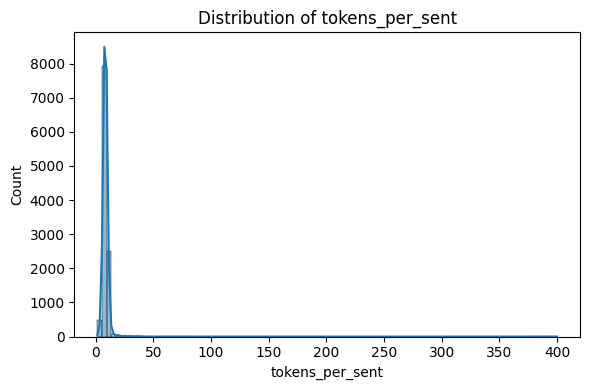

plotting the distribution for attribute: char_per_tok, if branch (Numerical)


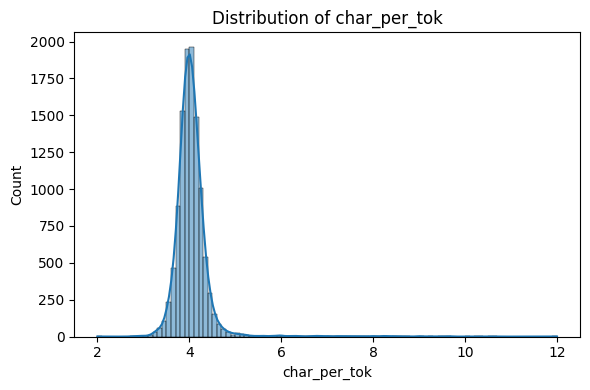

plotting the distribution for attribute: lexical_density, if branch (Numerical)


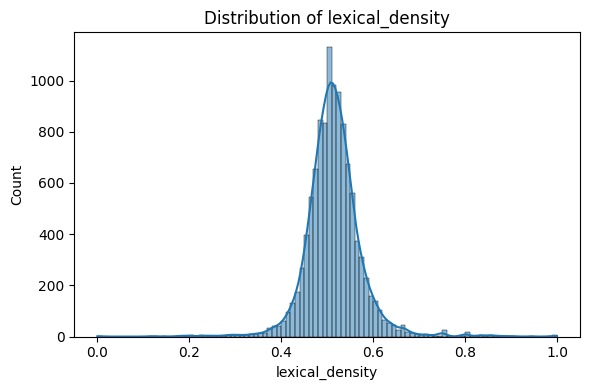

plotting the distribution for attribute: avg_token_per_clause, if branch (Numerical)


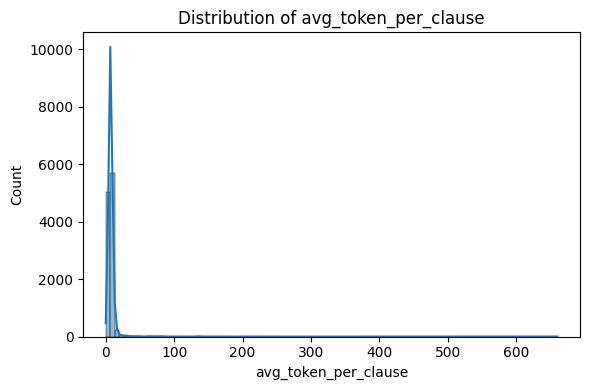

plotting the distribution for attribute: bpm, if branch (Numerical)


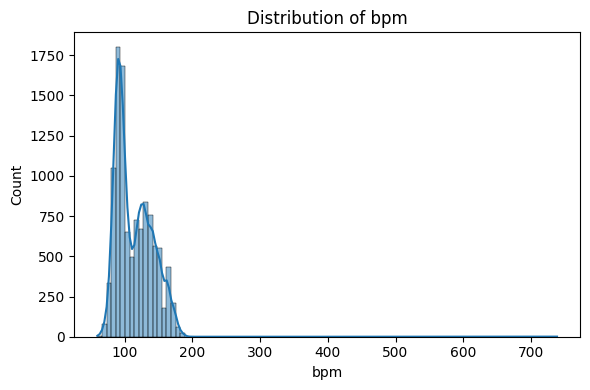

plotting the distribution for attribute: centroid, if branch (Numerical)


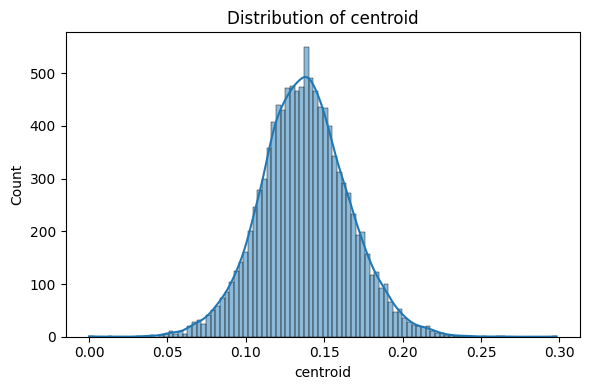

plotting the distribution for attribute: rolloff, if branch (Numerical)


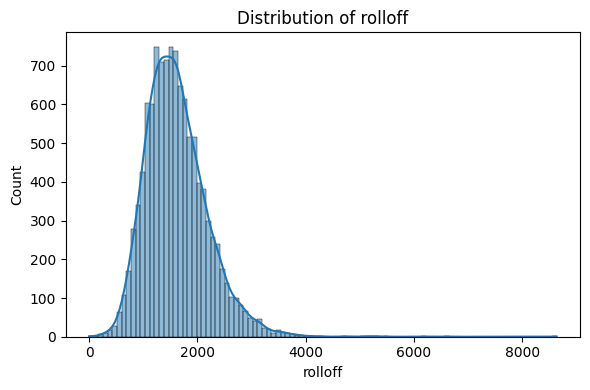

plotting the distribution for attribute: flux, if branch (Numerical)


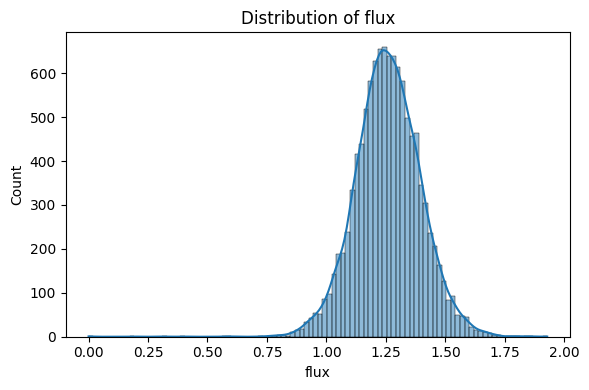

plotting the distribution for attribute: rms, if branch (Numerical)


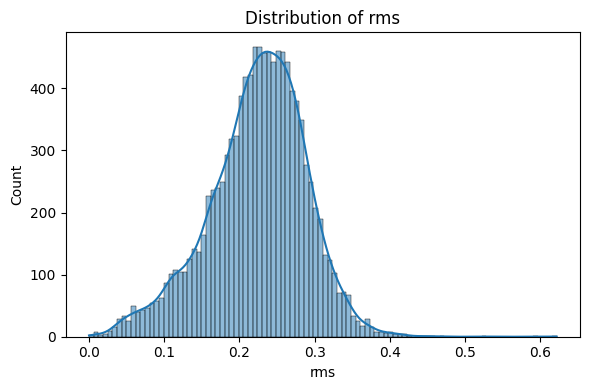

plotting the distribution for attribute: zcr, if branch (Numerical)


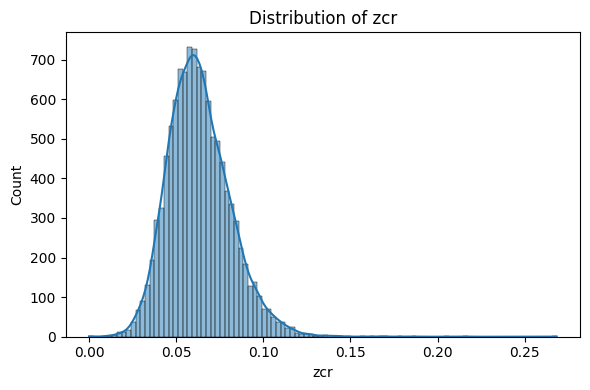

plotting the distribution for attribute: flatness, if branch (Numerical)


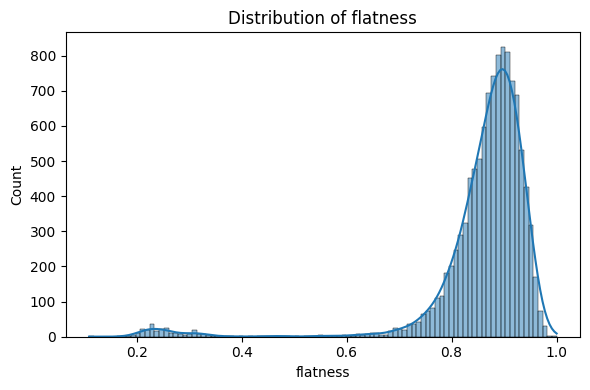

plotting the distribution for attribute: spectral_complexity, if branch (Numerical)


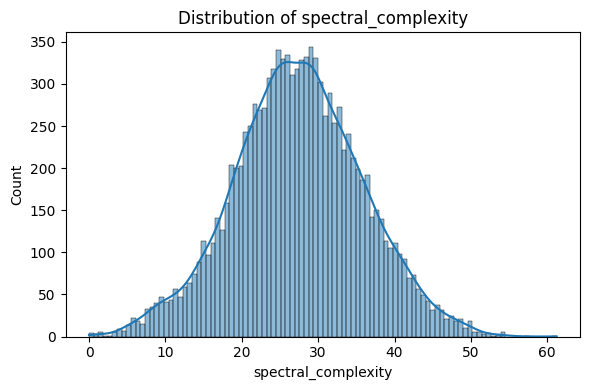

plotting the distribution for attribute: pitch, if branch (Numerical)


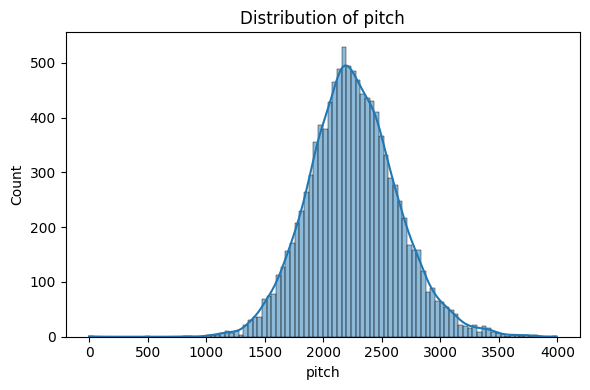

plotting the distribution for attribute: loudness, if branch (Numerical)


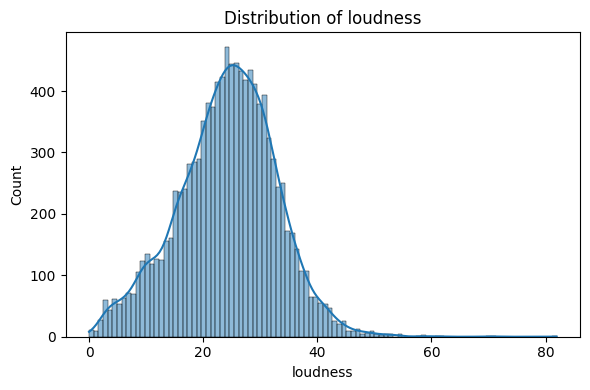

plotting the distribution for attribute: album_name, else branch (Categorical)


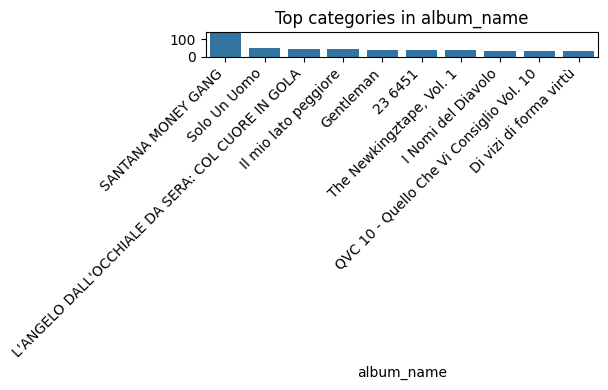

plotting the distribution for attribute: album_release_date, else branch (Categorical)


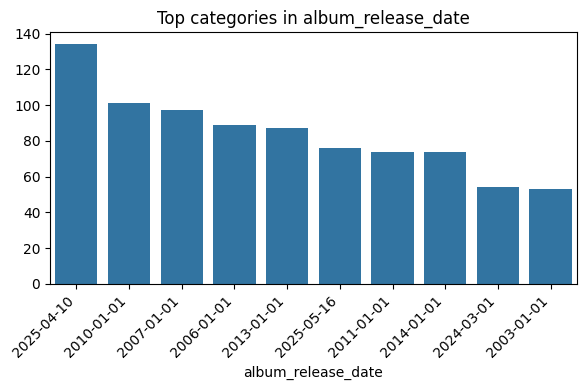

plotting the distribution for attribute: album_type, else branch (Categorical)


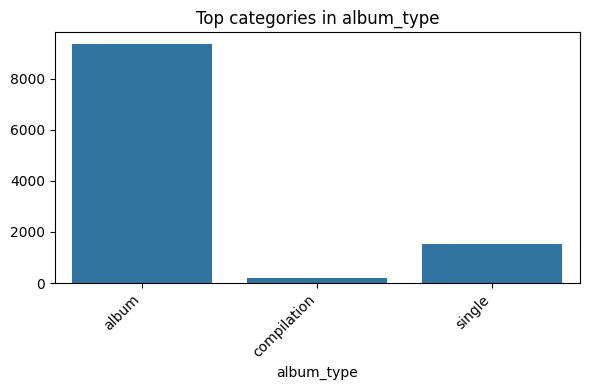

plotting the distribution for attribute: disc_number, if branch (Numerical)


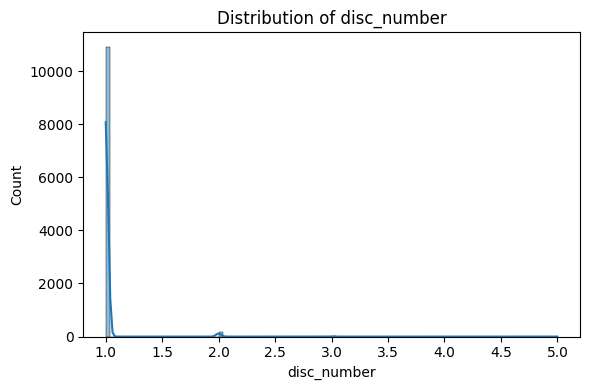

plotting the distribution for attribute: track_number, if branch (Numerical)


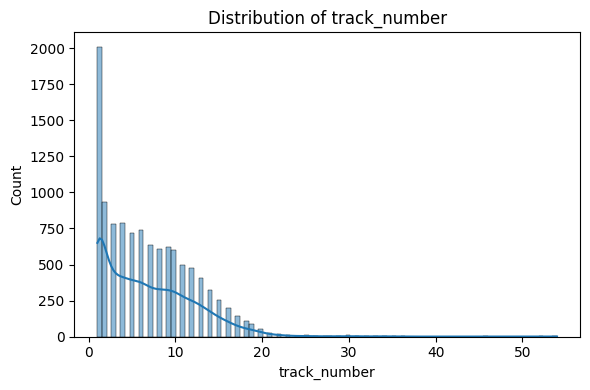

plotting the distribution for attribute: duration_ms, if branch (Numerical)


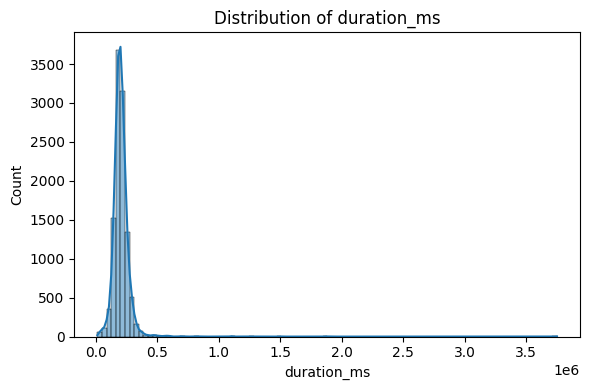

plotting the distribution for attribute: explicit, else branch (Categorical)


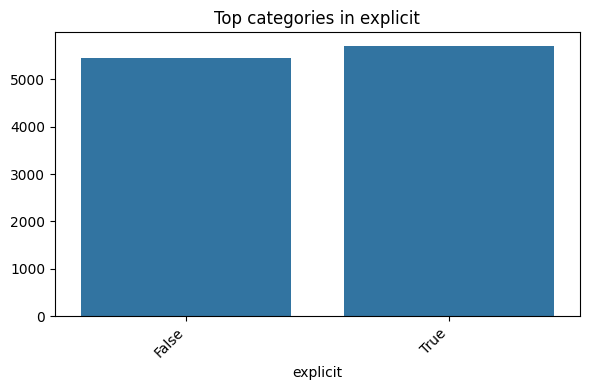

plotting the distribution for attribute: popularity, if branch (Numerical)


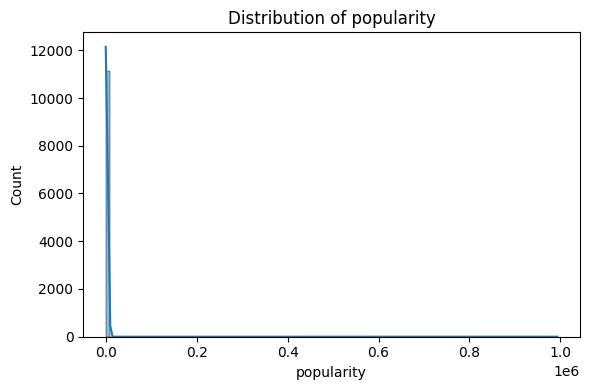

plotting the distribution for attribute: album_image, else branch (Categorical)


/tmp/ipykernel_47541/4214594416.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


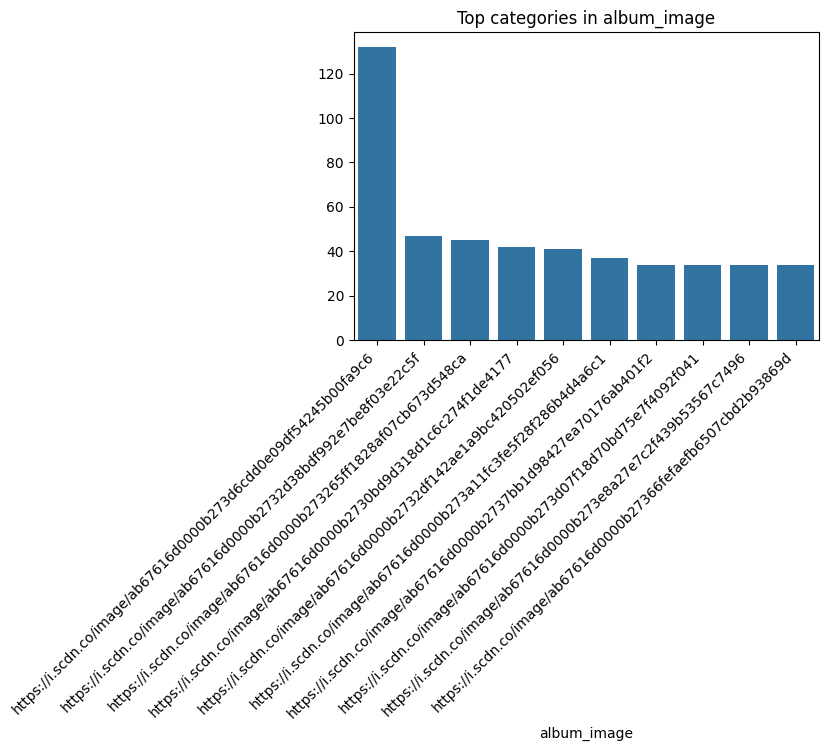

plotting the distribution for attribute: id_album, else branch (Categorical)


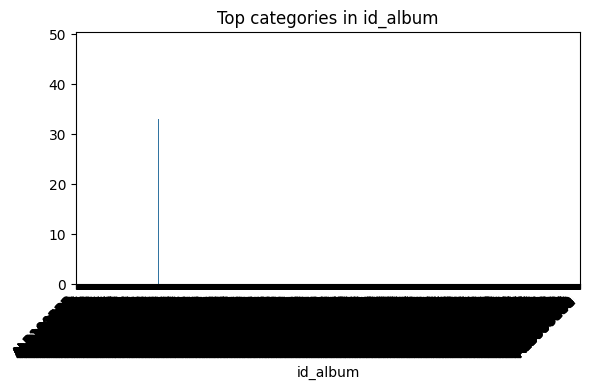

plotting the distribution for attribute: lyrics, else branch (Categorical)


/tmp/ipykernel_47541/4214594416.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


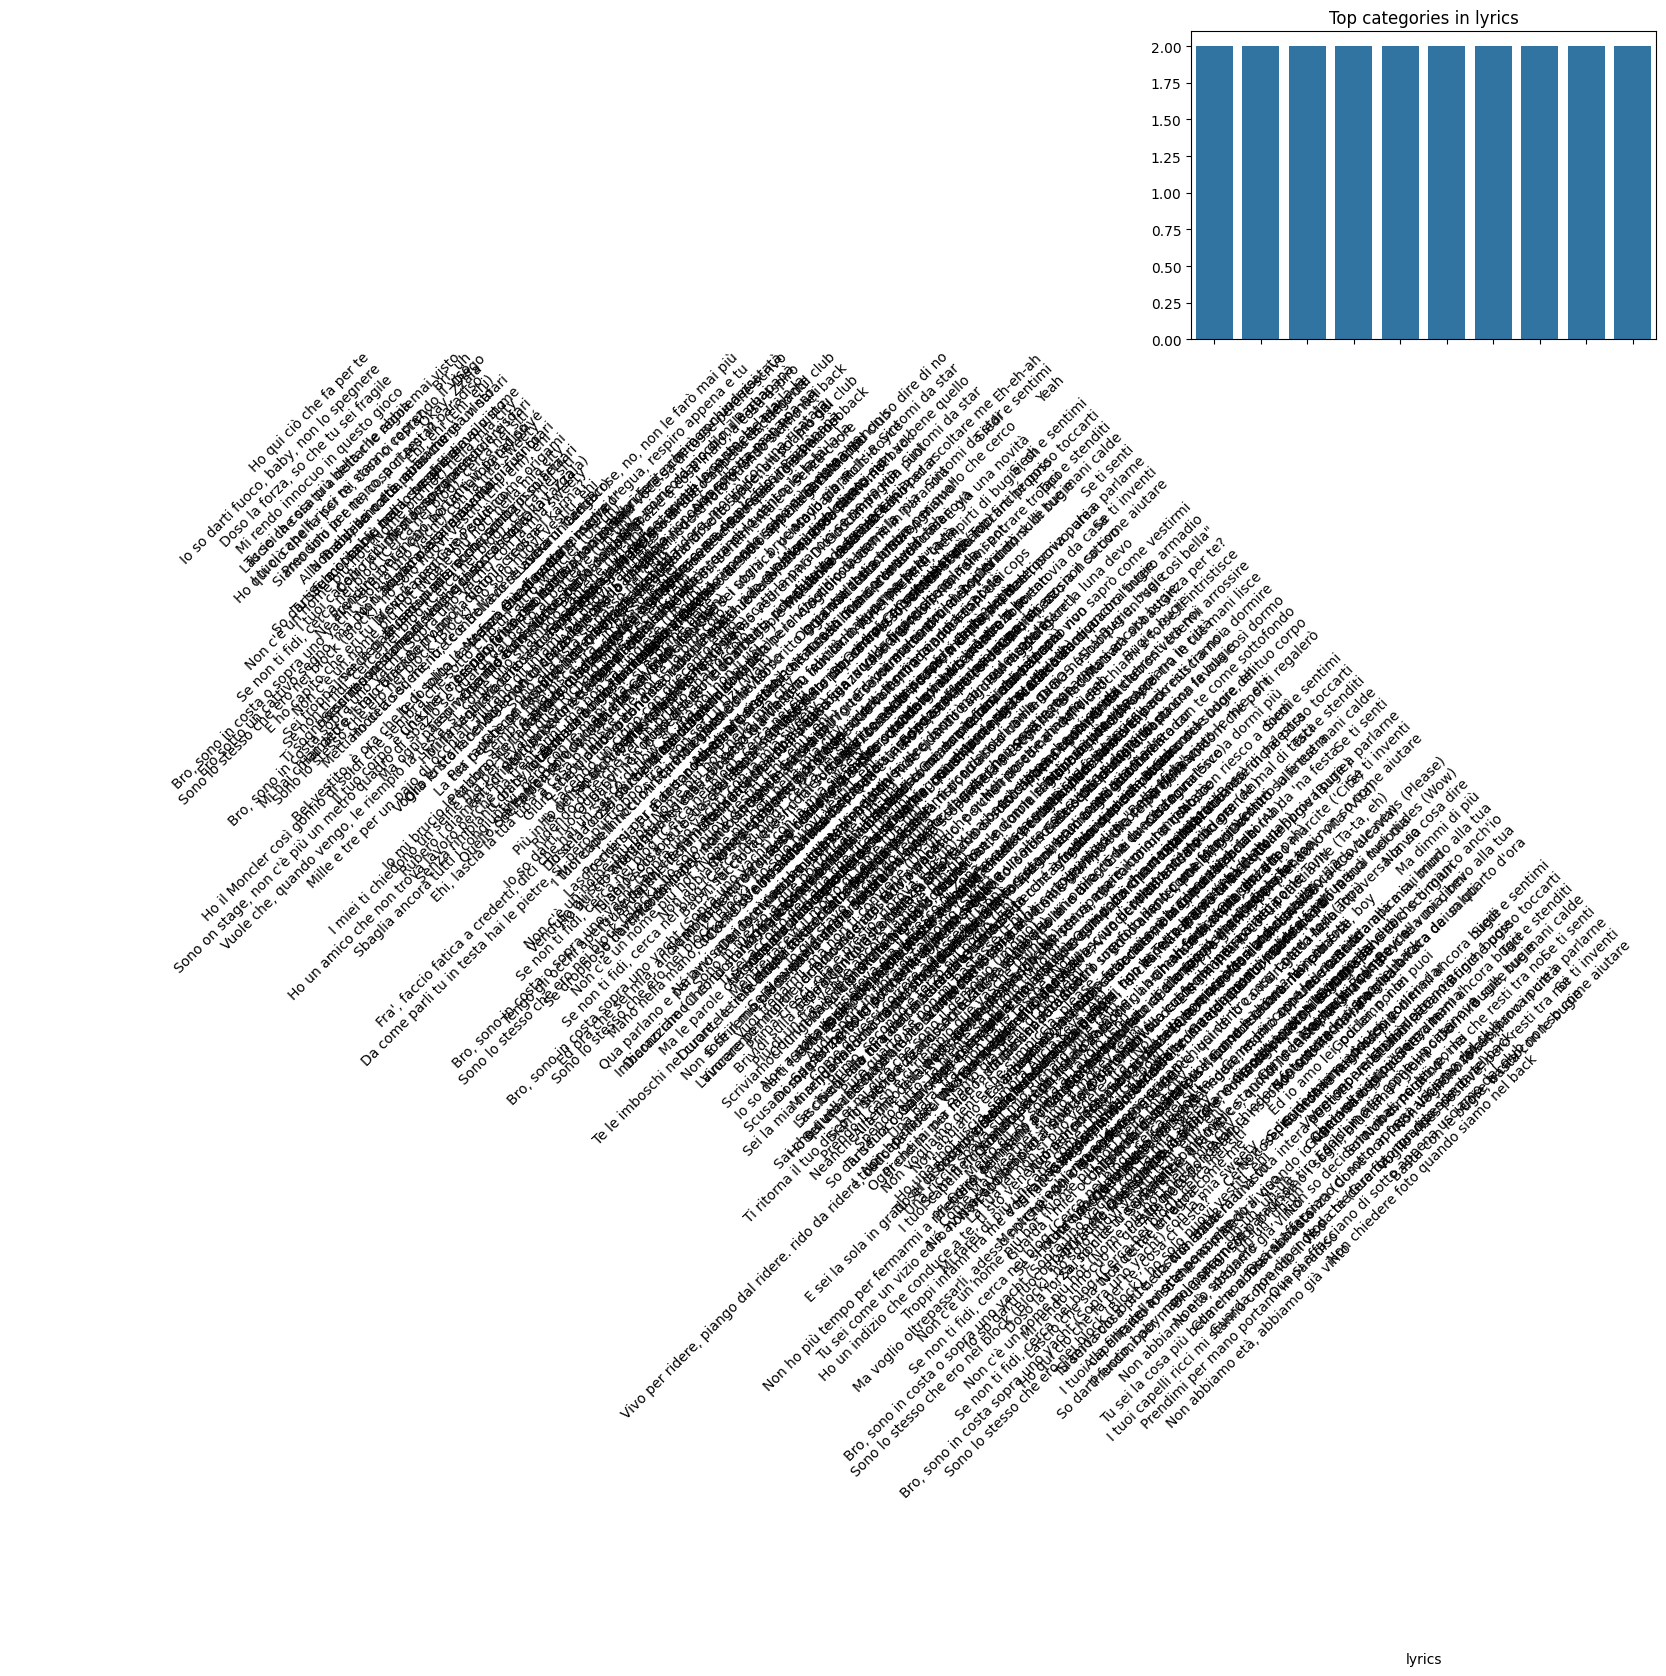

plotting the distribution for attribute: modified_popularity, else branch (Categorical)


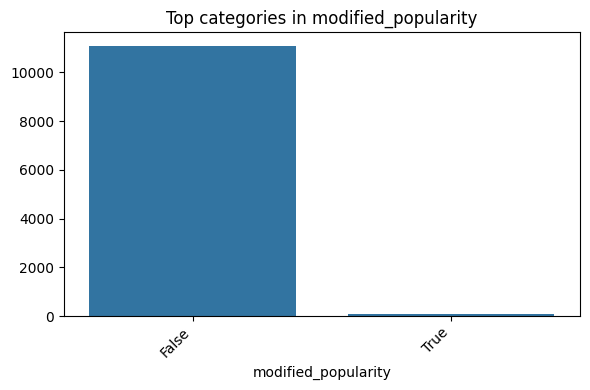

In [17]:
for col in df_tracks.columns:
    plt.figure(figsize=(6,4))
    
    # --- Check for Numerical Columns (includes float64, int64, and Nullable Int64) ---
    # Using .kind in 'fi' is a reliable way to check for all float and integer types
    if df_tracks[col].dtype.kind in 'fi': 
        print(f"plotting the distribution for attribute: {col}, if branch (Numerical)")
        
        data_to_plot = df_tracks[col].dropna()
            
        sns.histplot(data_to_plot, kde=True, bins = 100)
        plt.title(f'Distribution of {col}')

    # --- Handle Categorical/Object Columns, using try/except for unhashable types ---
    # We use a try/except to catch the 'unhashable type: list' error gracefully
    else:
        try:
            print(f"plotting the distribution for attribute: {col}, else branch (Categorical)")
            
            # The error occurs here if the column contains Python lists
            counts = df_tracks[col].value_counts().head(10)
            
            # Only proceed if there are values to plot
            if not counts.empty:
                sns.barplot(x=counts.index, y=counts.values)
                plt.title(f'Top categories in {col}')
                plt.xticks(rotation=45, ha='right')
            else:
                print(f"Skipping categorical plot for {col}: Value counts were empty.")

        except TypeError as e:
            # This handles the 'TypeError: unhashable type: 'list'' gracefully
            if 'unhashable type' in str(e):
                print(f"Skipping plot for {col}: Column contains unhashable types (e.g., Python lists).")
            else:
                # Re-raise any other unexpected TypeErrors
                raise e

    plt.tight_layout()
    plt.show()

The preceding visual analysis of attribute distributions has successfully illuminated several data quality issues, specifically the presence of erroneous values. These include instances such as:

* Temporal Inconsistencies: Values for the year attribute that fall outside the reasonable bounds defined by an artist's active_start and the current date.

* Domain Violations: Values for the popularity attribute that exceed its established domain maximum of 100.

These specific data integrity issues will be formally addressed and rectified in the subsequent Data Preparation phase. 

For the current Data Understanding phase, our objective remains strictly observational: to characterize the data's shape and quality without enacting any permanent modifications.We will now proceed with a preliminary, univariate outlier detection step. This involves plotting boxplots for each numerical attribute to visually quantify the number of data instances that fall outside the traditional whisker boundaries (typically defined by $1.5 \times \text{IQR}$). This process will yield a clearer, attribute-by-attribute assessment of the prevalence and extremity of outliers within the dataset.

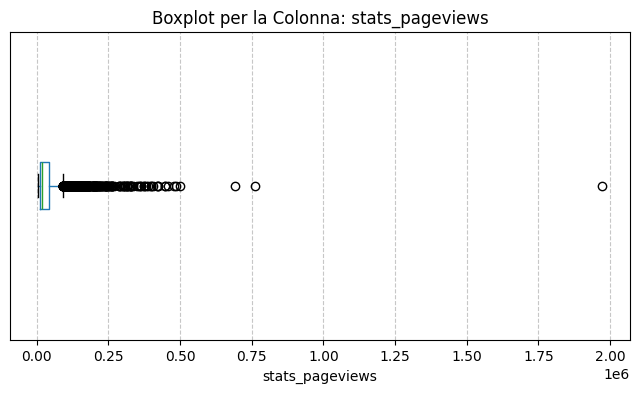

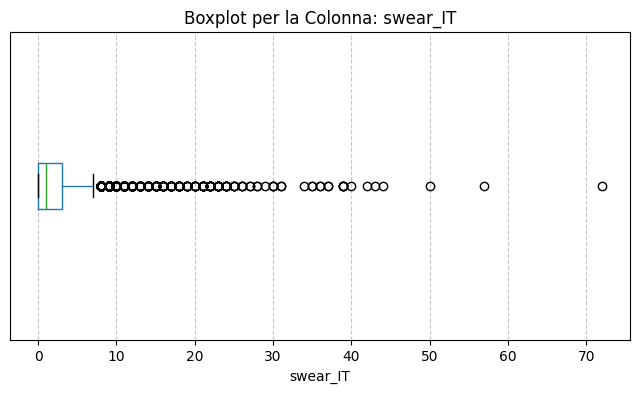

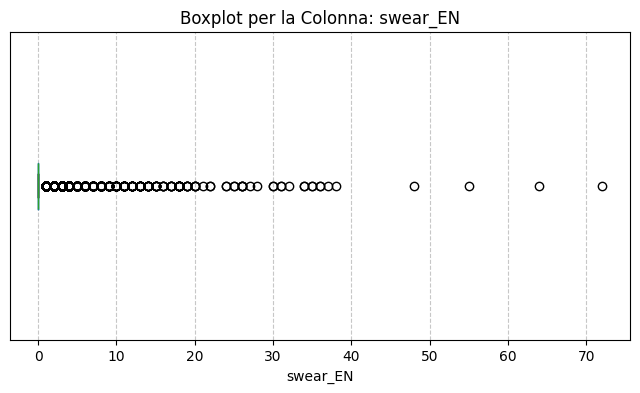

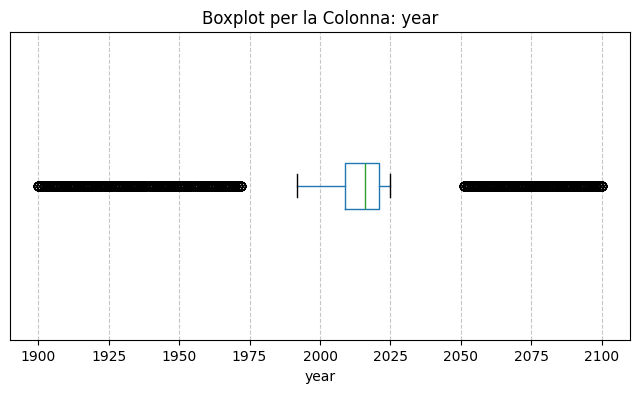

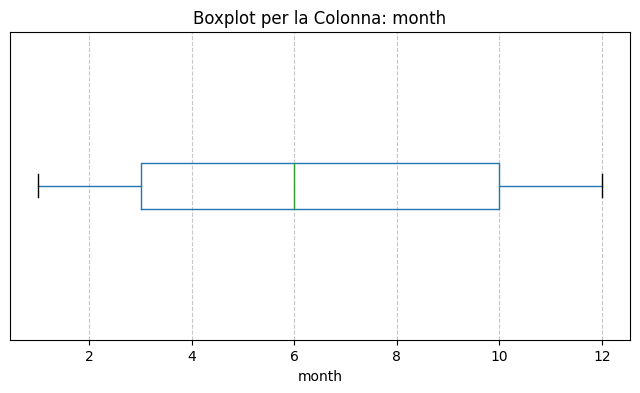

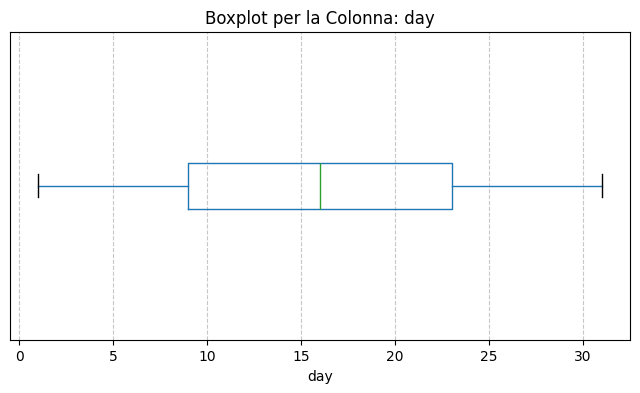

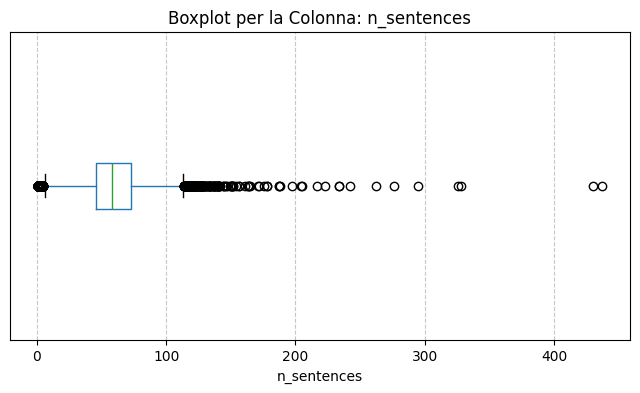

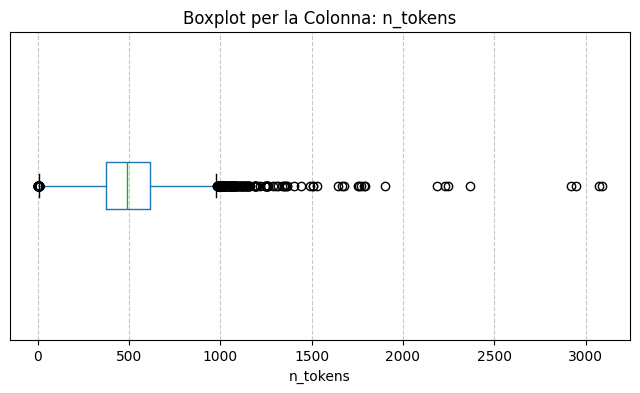

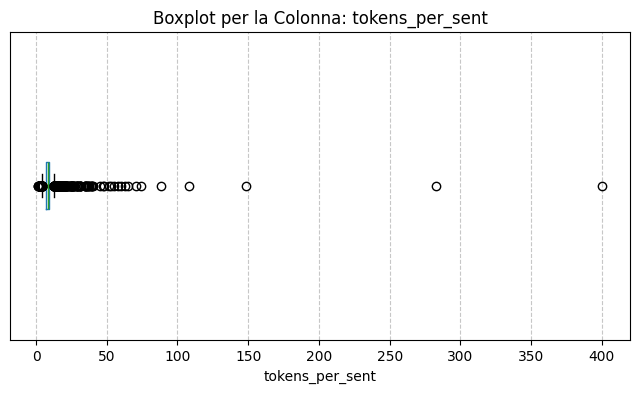

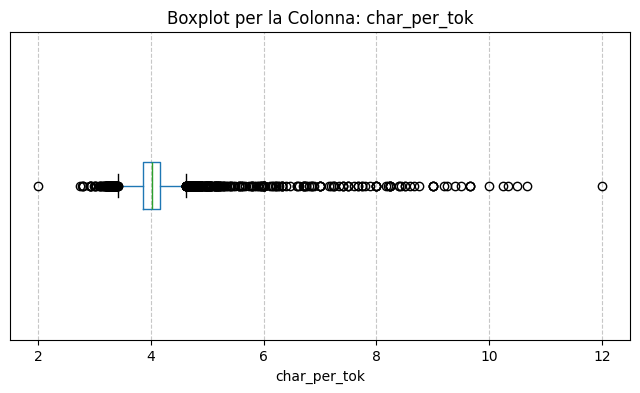

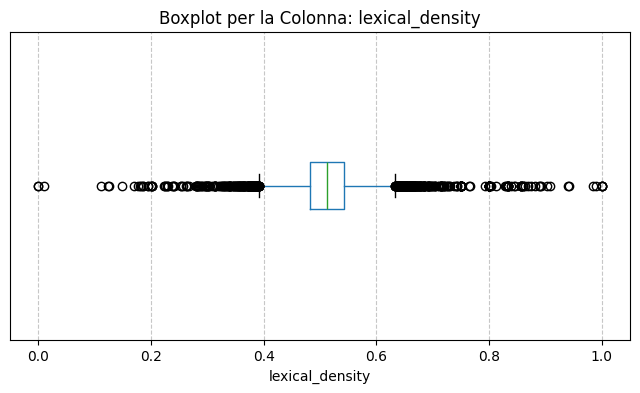

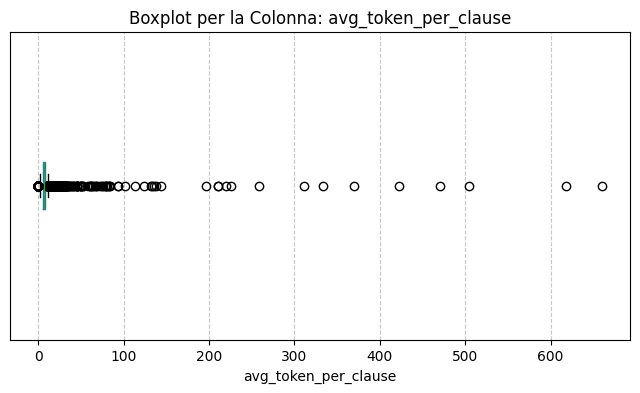

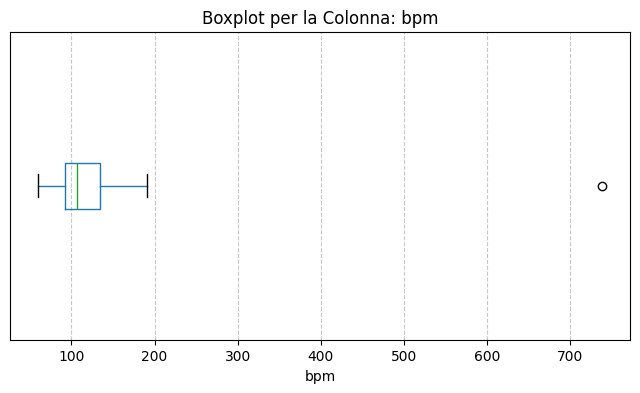

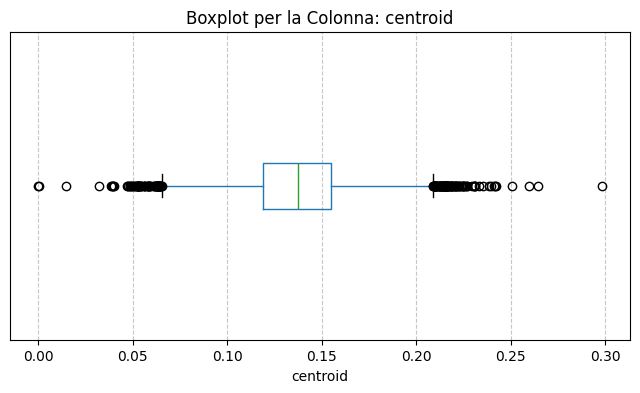

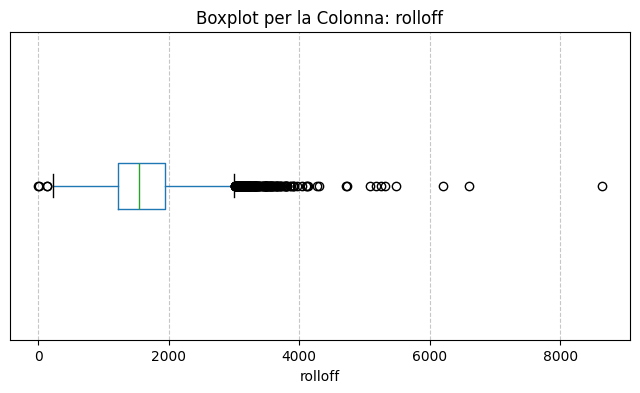

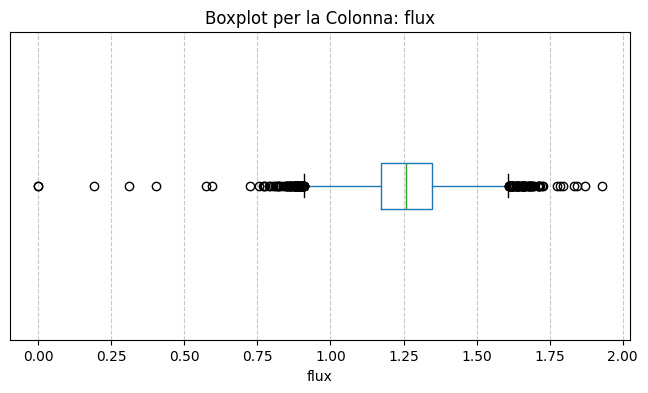

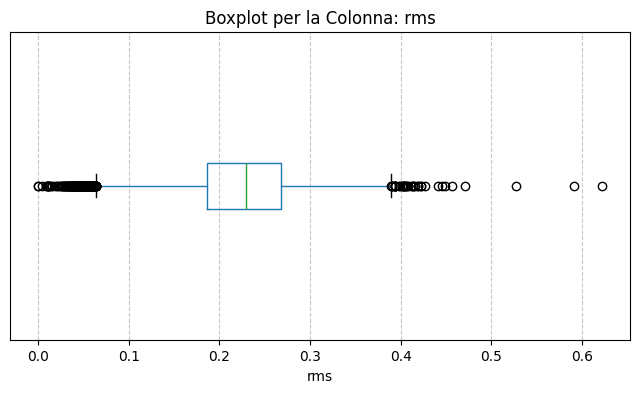

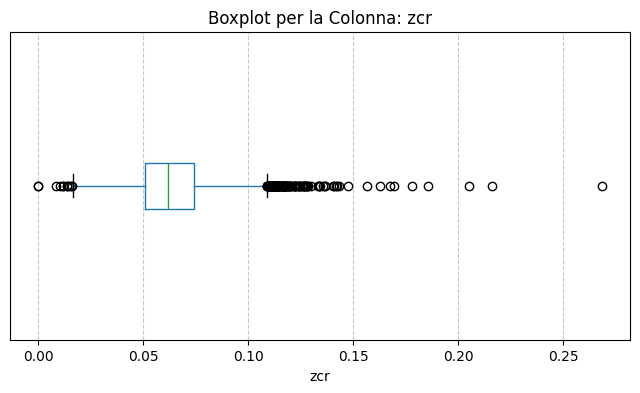

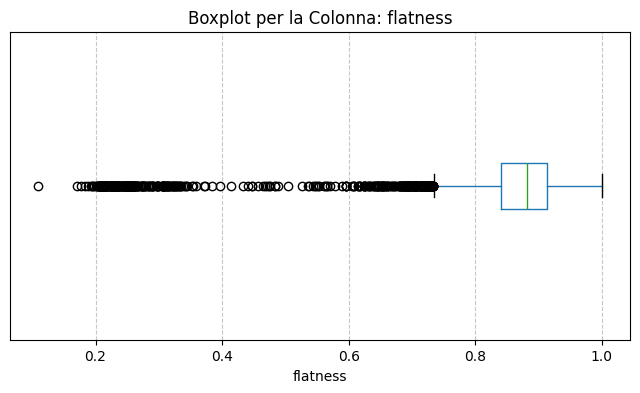

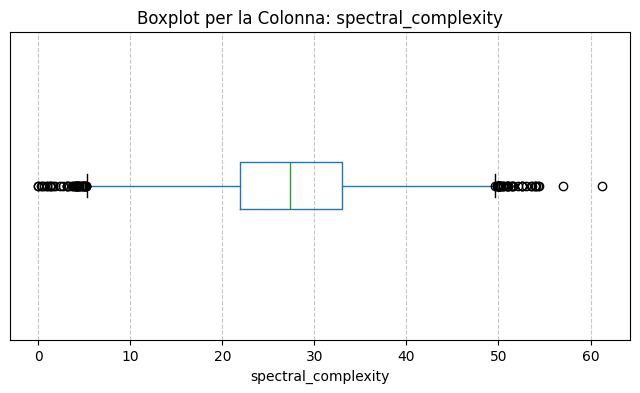

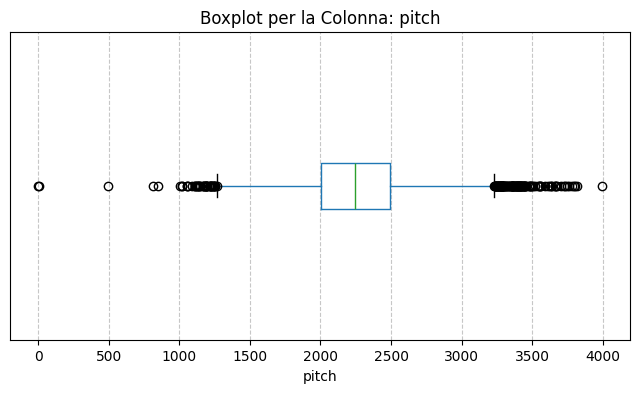

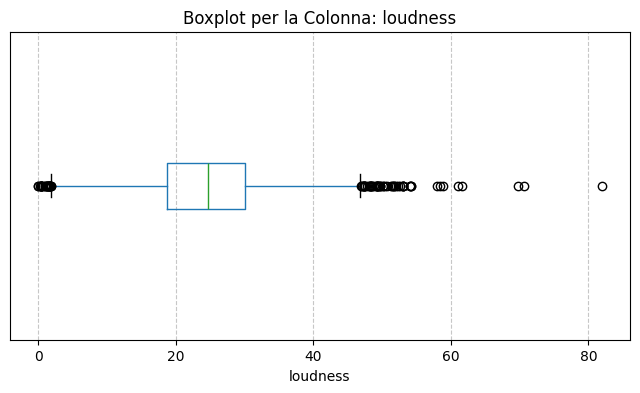

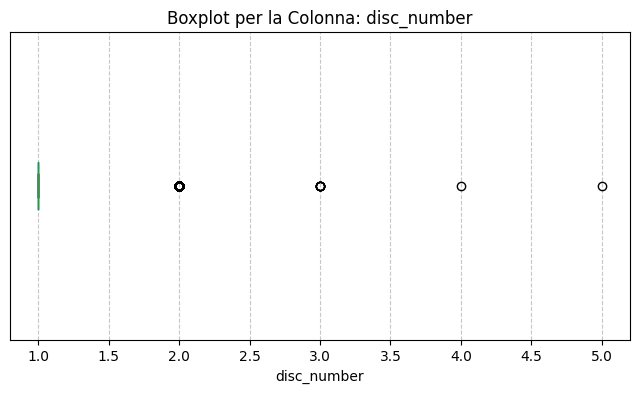

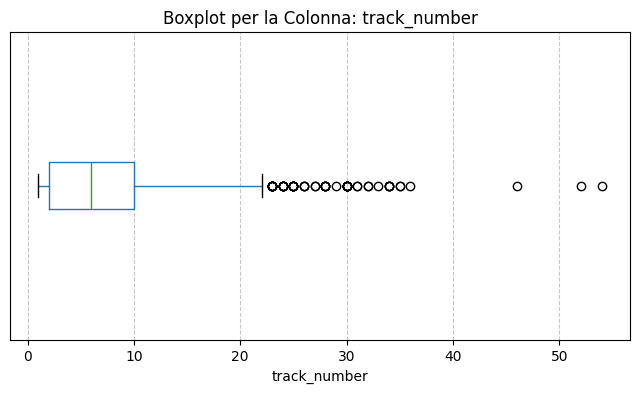

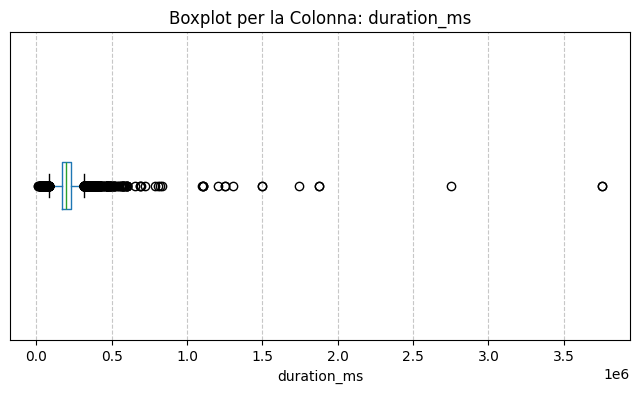

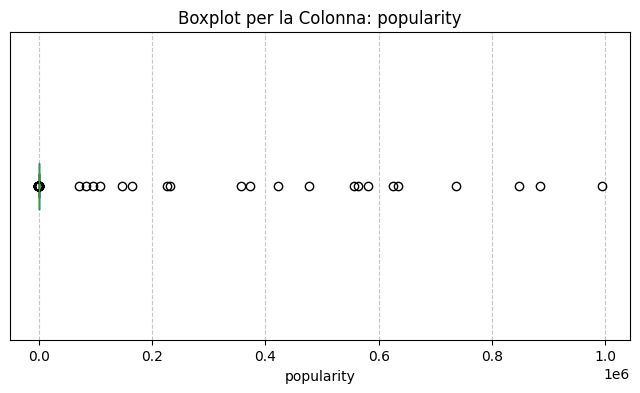

In [18]:
# Seleziona solo le colonne numeriche
df_numeric = df_tracks.select_dtypes(include=np.number)

# Scorri ogni colonna numerica e crea un boxplot separato
for col in df_numeric.columns:
    
    # Crea un nuovo grafico per la colonna corrente
    plt.figure(figsize=(8, 4))
    
    # Genera il boxplot. L'argomento vert=False lo rende orizzontale, più facile da leggere
    df_numeric.boxplot(column=col, vert=False)
    
    # Personalizzazione
    plt.title(f"Boxplot per la Colonna: {col}")
    plt.xlabel(col)
    plt.yticks([]) # Nasconde l'etichetta dell'asse Y (che non serve in un boxplot singolo)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.show()

#### AAAAAAAAAAAAAAAAAAAAA

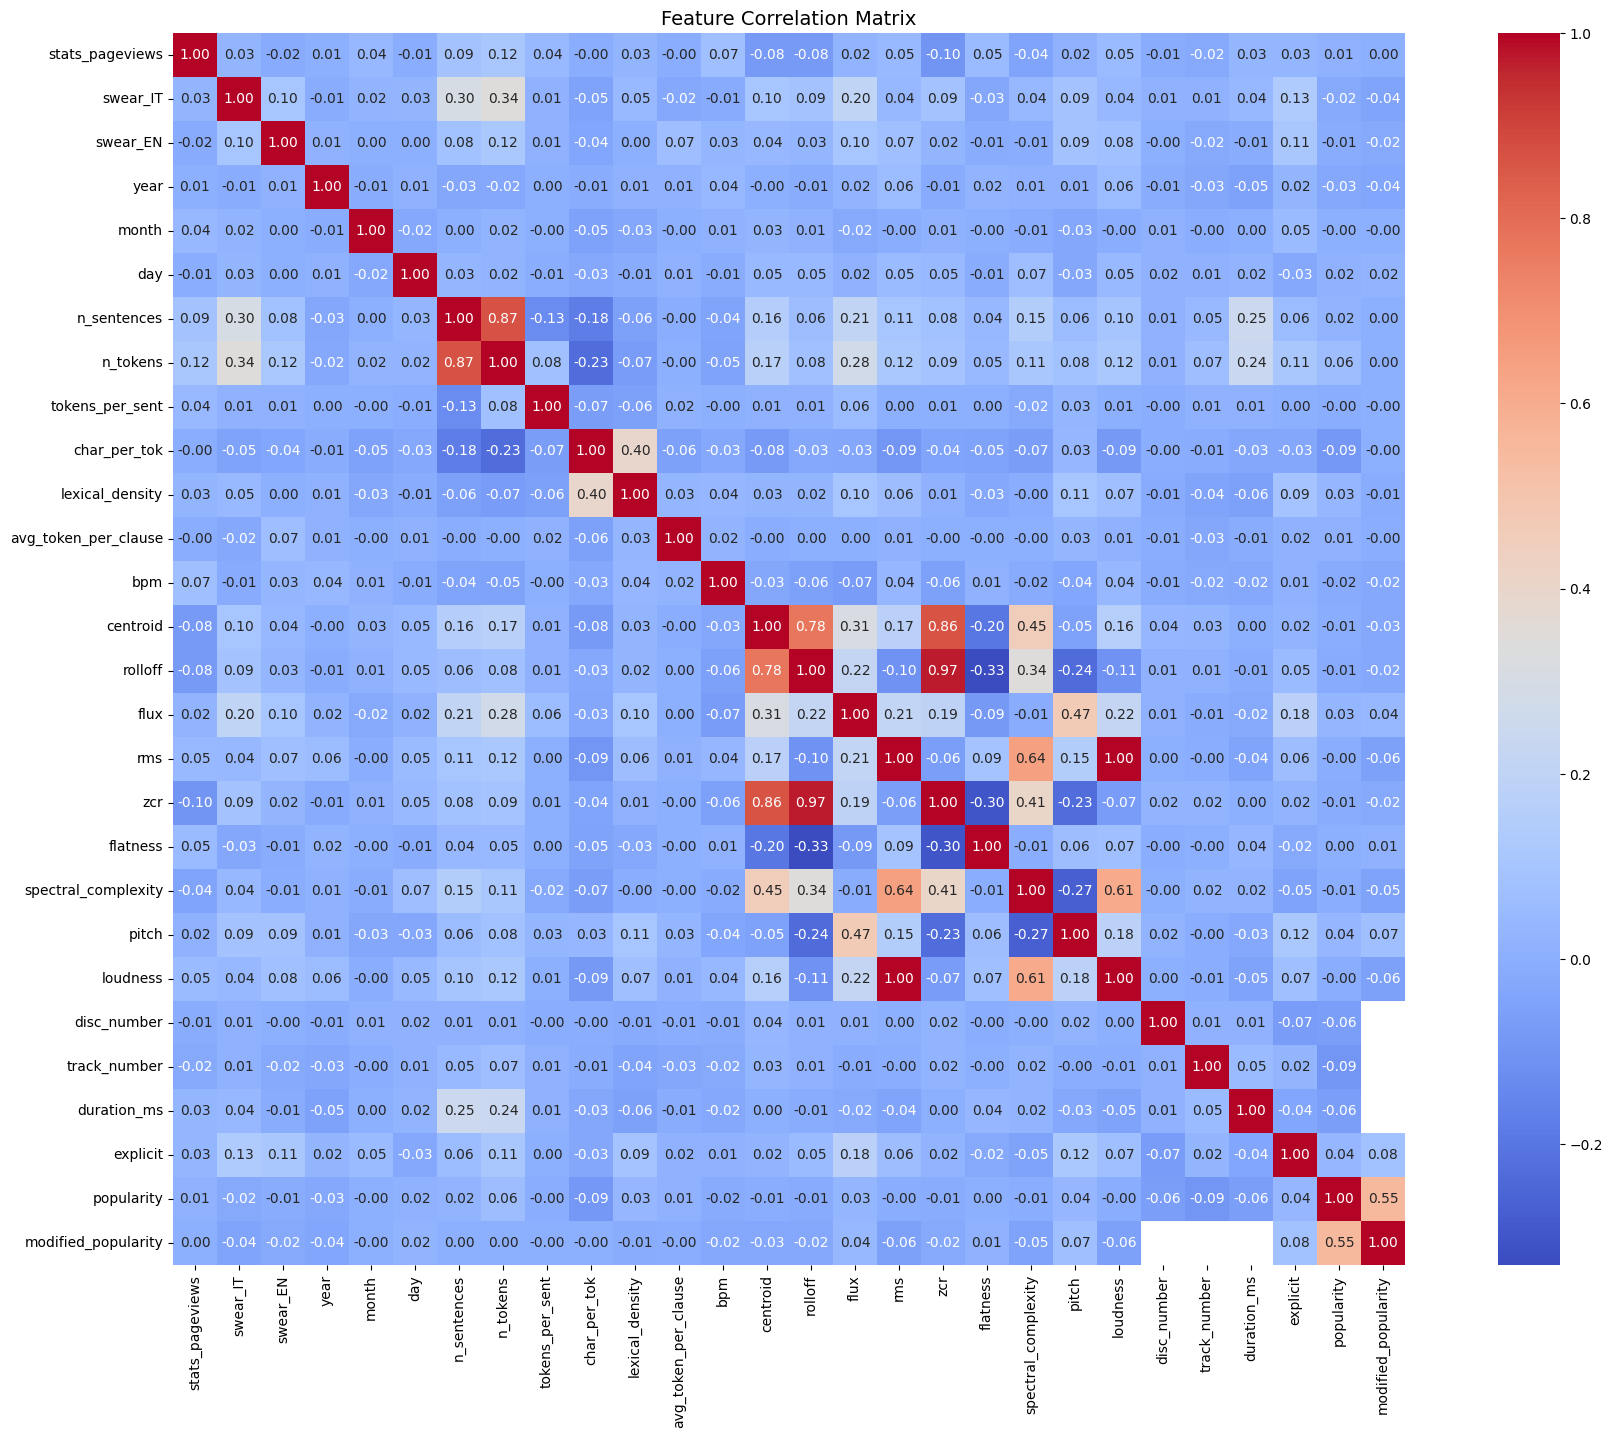

In [19]:
corr_matrix = df_tracks.corr(numeric_only=True)

plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

Popularity studies:

Popularity è type object e i valori null della sono 2. I valori unici sono 170, di cui 97 sono nel range corretto (0<= x <=100), filtrando e mantenendo solamente i record con questi ultimi abbiamo 11088 occorrenze rispetto alle 11164 iniziali

In [ ]:
df_tracks['popularity'].describe()

count     11164
unique      170
top        34.0
freq        217
Name: popularity, dtype: object

In [ ]:
df_tracks.reset_index(drop=True, inplace=True)

# 2. Ora il tuo codice di filtraggio funzionerà correttamente:
pop = pd.to_numeric(df_tracks['popularity'], errors='coerce')
np.set_printoptions(threshold=np.inf) # Impostazione per la stampa di NumPy
filtered_pop = pop[(pop >= 0) & (pop <= 100)]

# 3. Assegnazione (Ora l'indice è unico e l'allineamento funziona)
df_tracks['filtered_pop'] = filtered_pop

In [ ]:
# 2. Ora il tuo codice di filtraggio funzionerà correttamente:
number_pop = pd.to_numeric(df_tracks['popularity'], errors='coerce')
np.set_printoptions(threshold=np.inf) # Impostazione per la stampa di NumPy

df_tracks['number_pop'] = number_pop

Per scegliere il numero di bins abbiamo usato la Sturges's rule

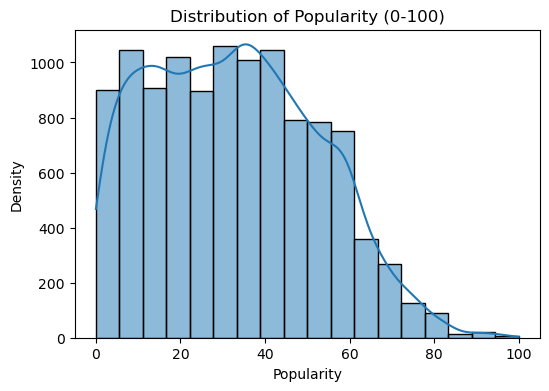

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(filtered_pop, kde=True, bins=18)
plt.title('Distribution of Popularity (0-100)') 
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()

In [ ]:
filtered_pop.value_counts().sort_index()

popularity
0.0      161
1.0      154
2.0      126
3.0      130
4.0      148
        ... 
93.0       4
94.0       4
95.0       2
97.0       4
100.0      1
Name: count, Length: 97, dtype: int64

In [ ]:
filtered_pop.describe()

count    11088.000000
mean        32.656295
std         19.781473
min          0.000000
25%         16.000000
50%         32.000000
75%         47.000000
max        100.000000
Name: popularity, dtype: float64

Year, Month e Day

In [ ]:
df_tracks['year'].value_counts().sort_index()

year
0S4bYq     1
1900      17
1901      14
1902      11
1903      18
          ..
uUsYUb     1
uiux8t     1
unxIUH     1
v9Gs4k     1
vgGgkT     1
Name: count, Length: 195, dtype: int64

In [ ]:
year = pd.to_numeric(df_tracks['year'], errors='coerce')
year_up = year[(year >= 0) & (year <= 100)]

Pairwise comparison

pairwise comparison with non modified data

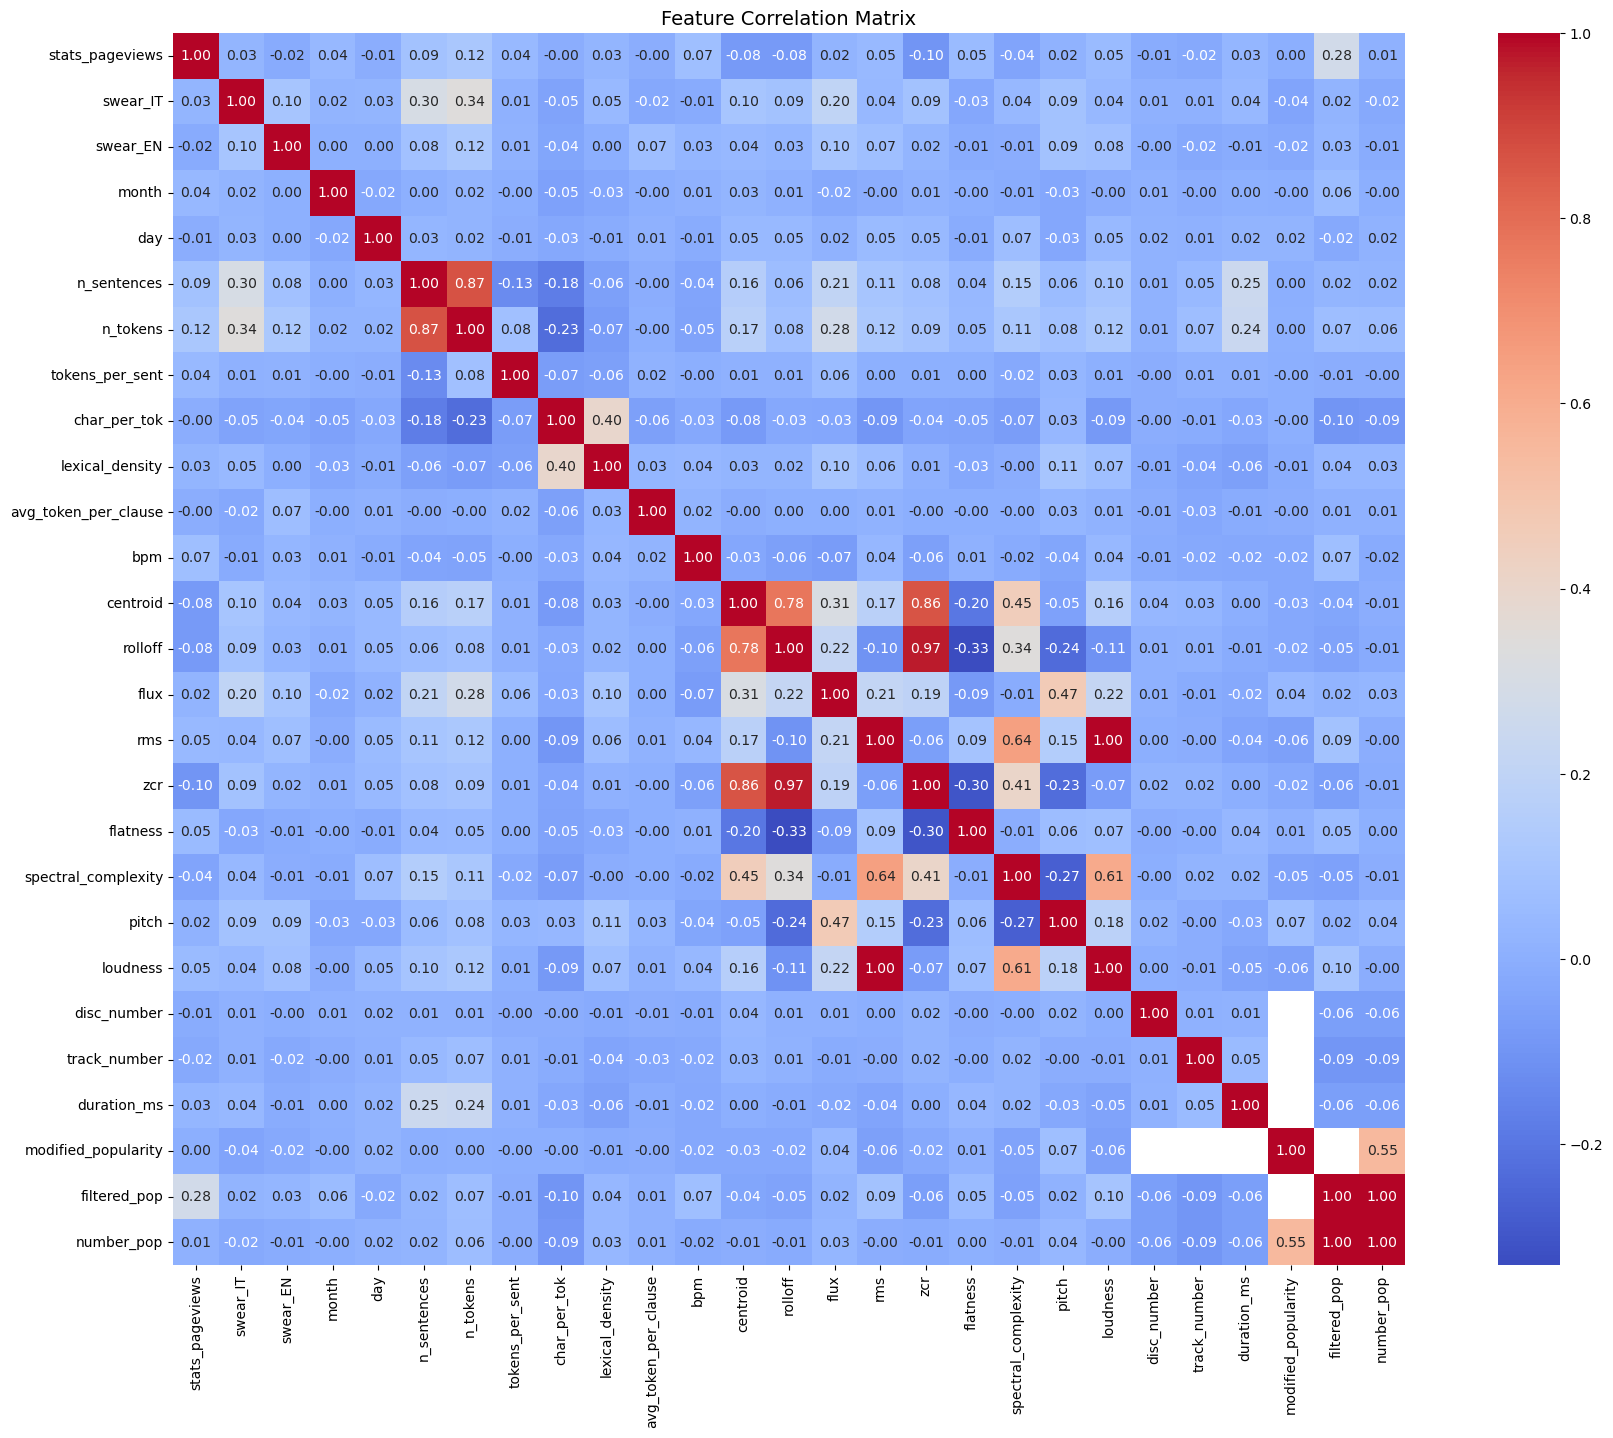

In [ ]:
corr_matrix = df_tracks.corr(numeric_only=True)

plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

pairwise comparison with modified data

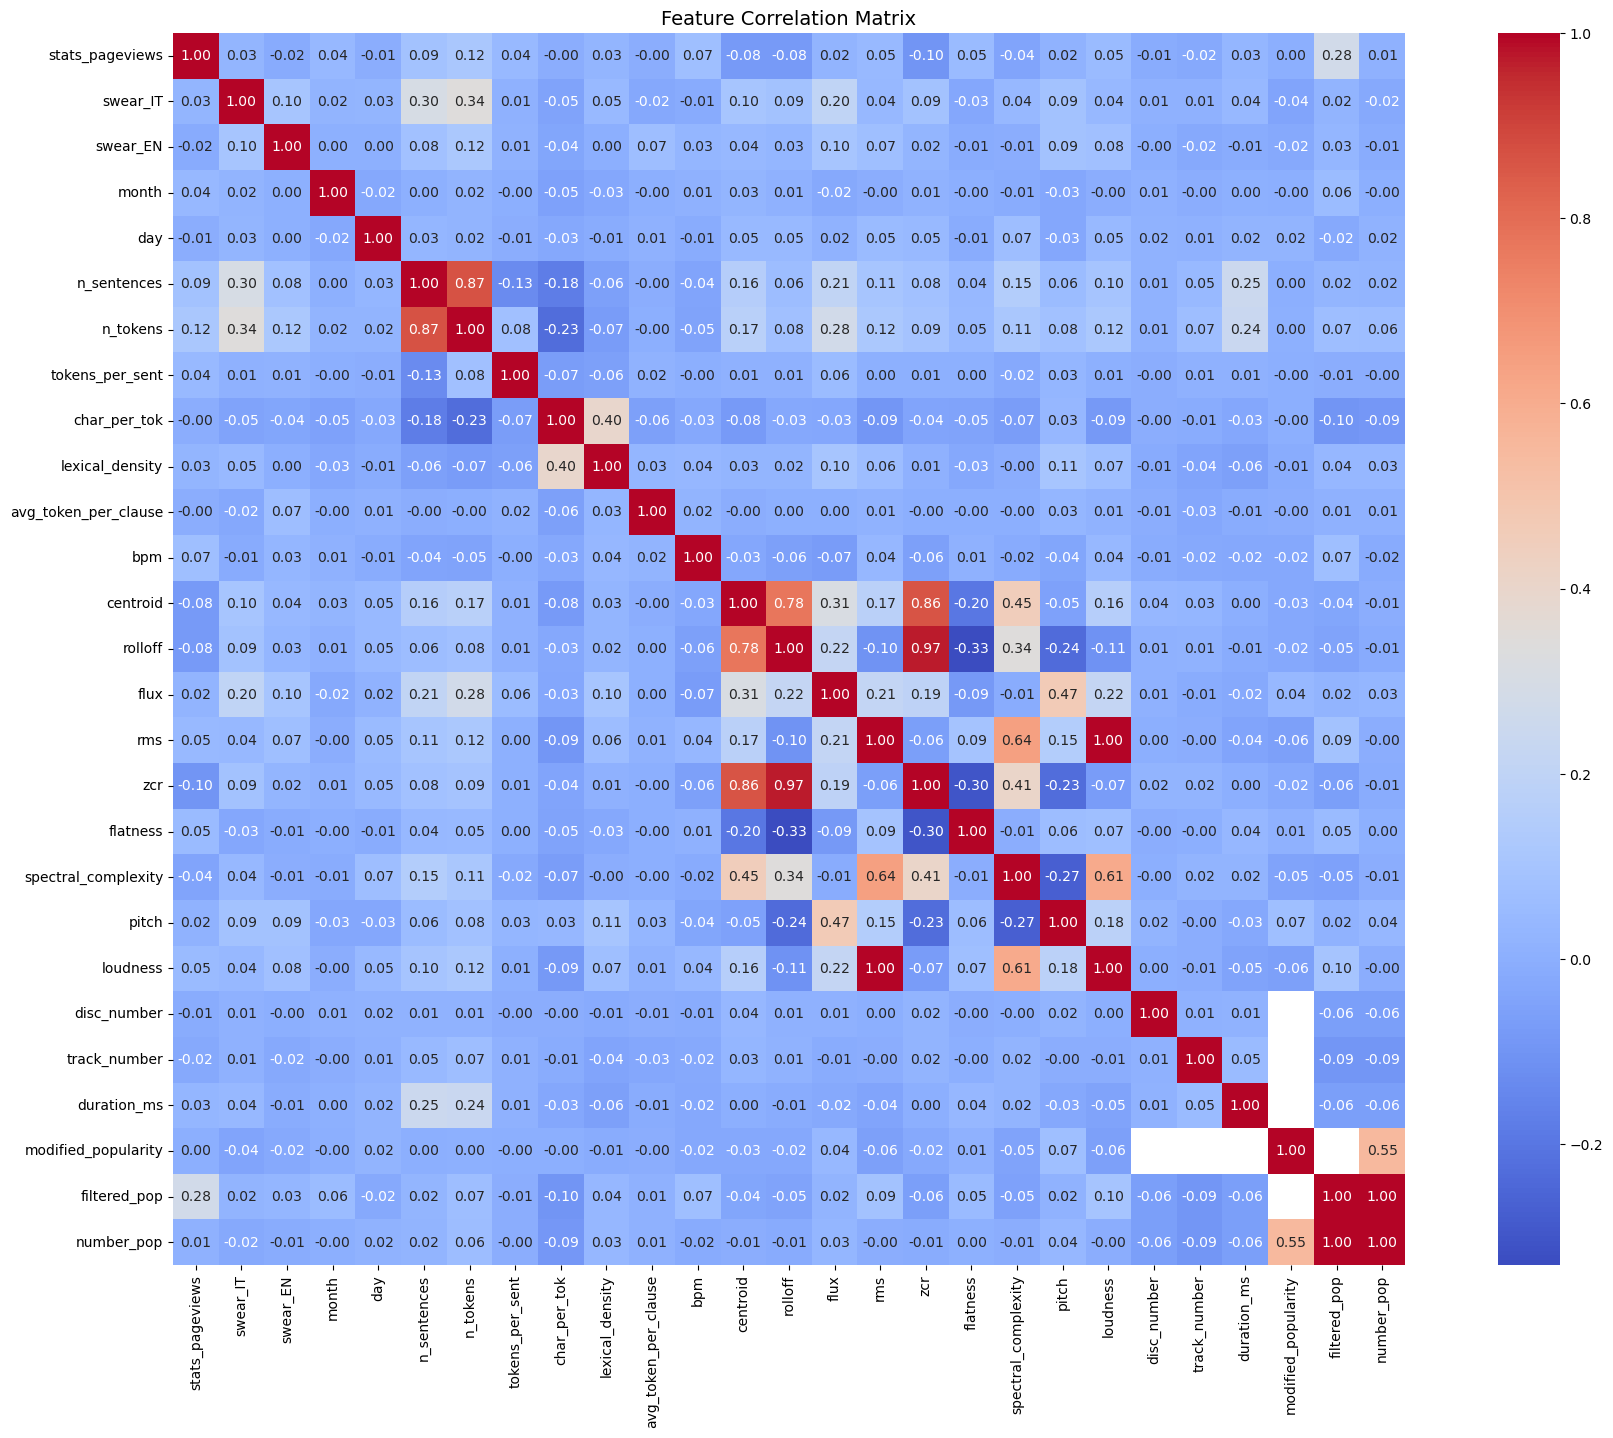

In [ ]:
corr_matrix = df_tracks.corr(numeric_only=True)

plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
df_tracks['stats_pageviews'].value_counts().sort_index()

stats_pageviews
5006.0       1
5007.0       1
5016.0       1
5017.0       2
5023.0       1
            ..
484090.0     1
499980.0     1
692900.0     1
762450.0     1
1971207.0    1
Name: count, Length: 4422, dtype: int64

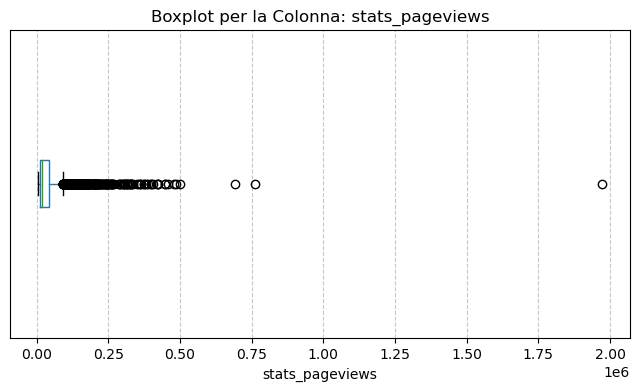

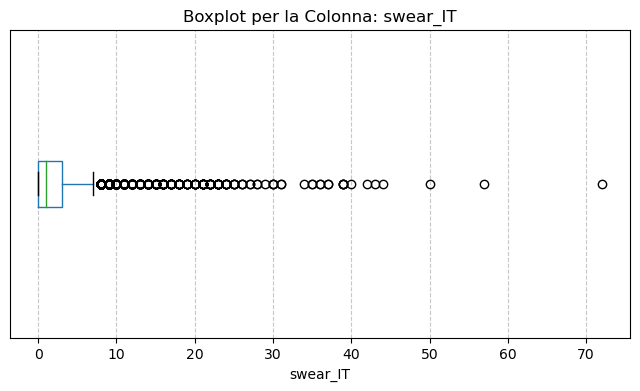

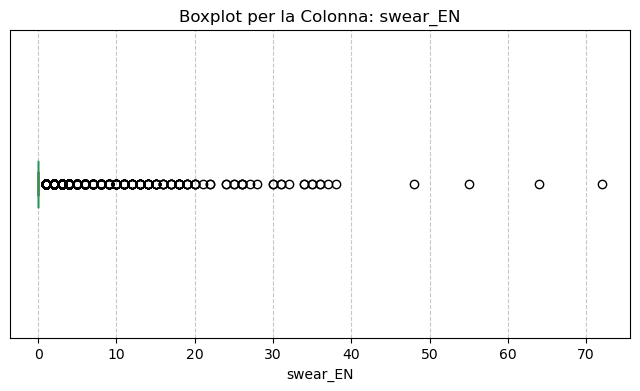

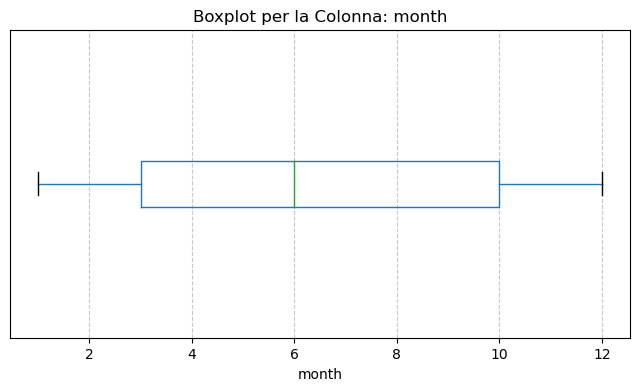

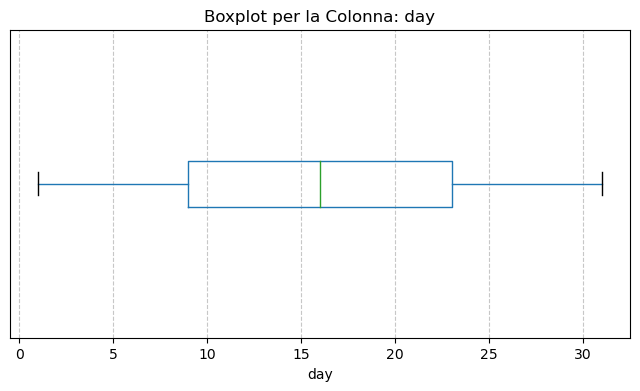

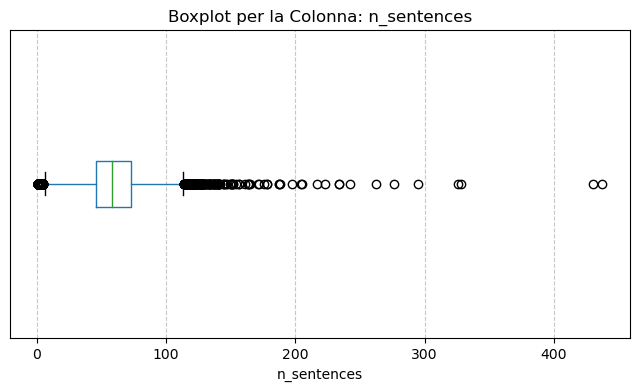

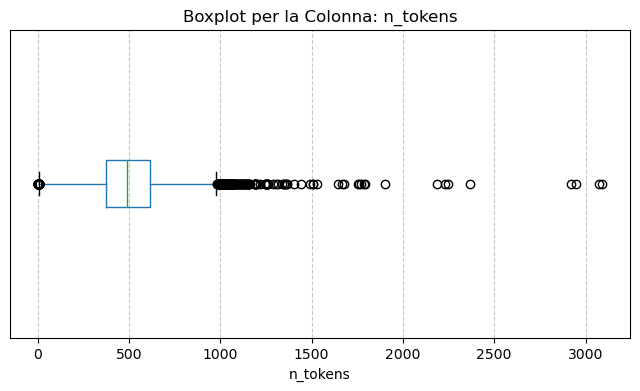

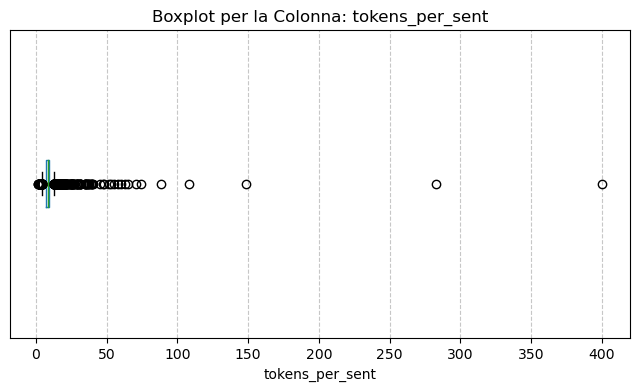

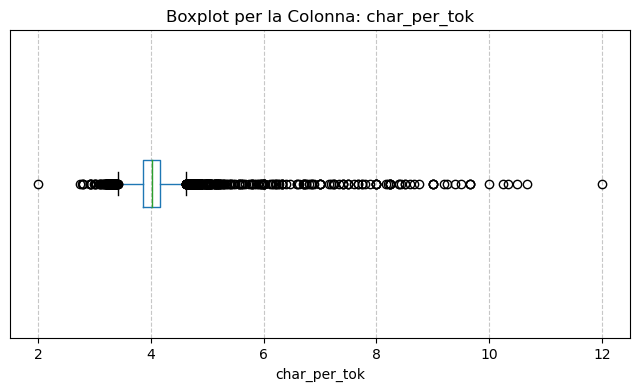

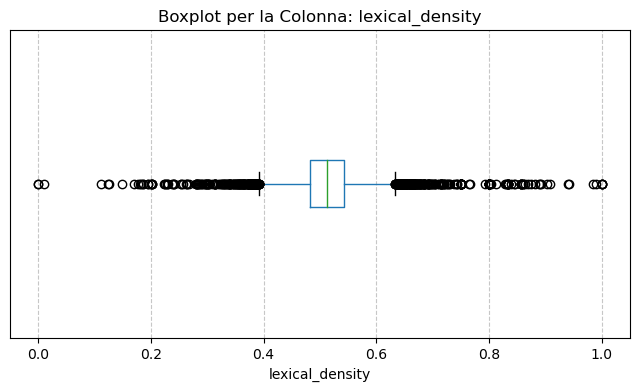

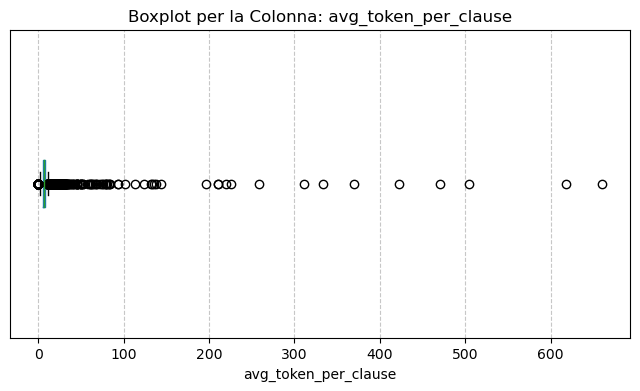

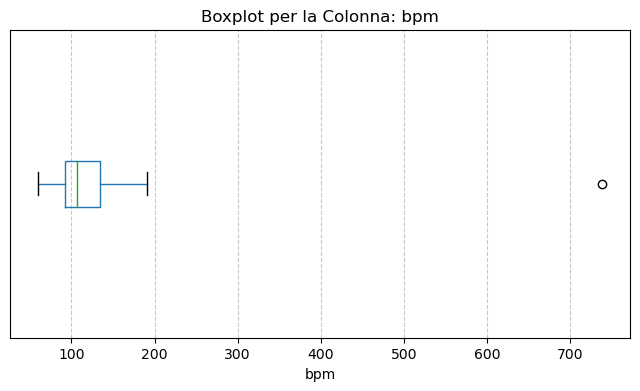

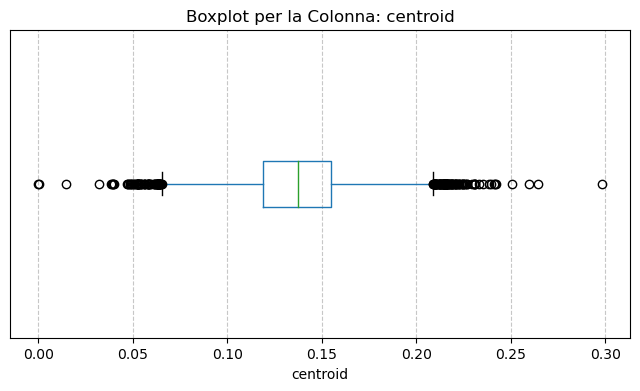

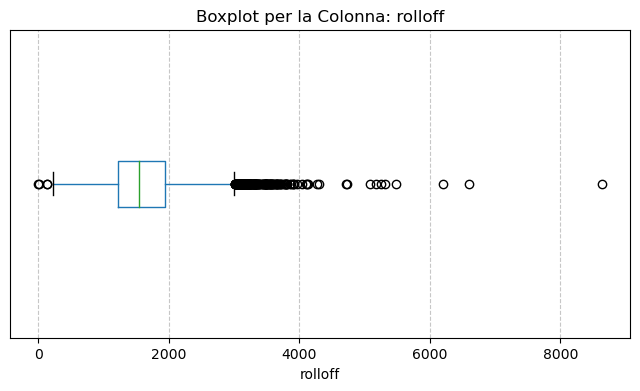

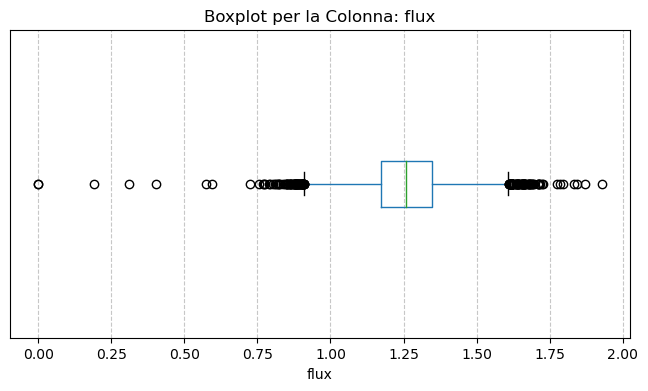

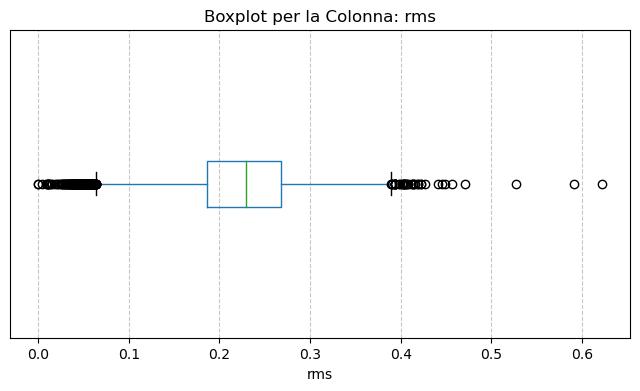

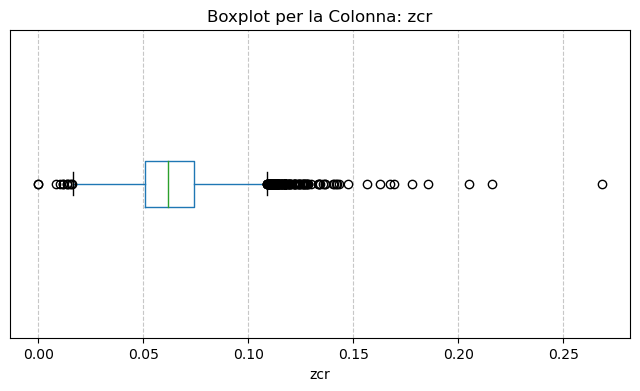

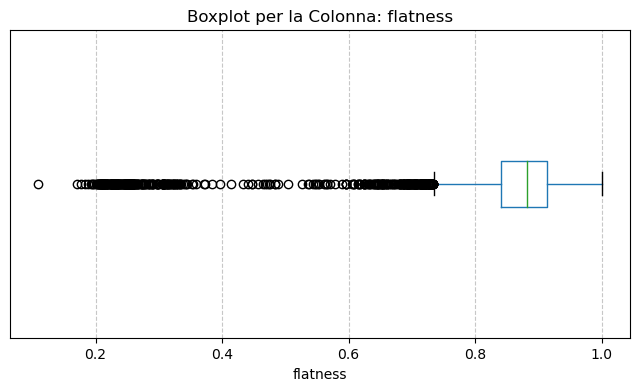

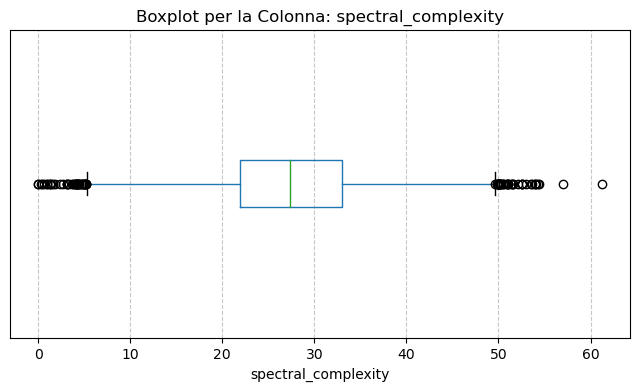

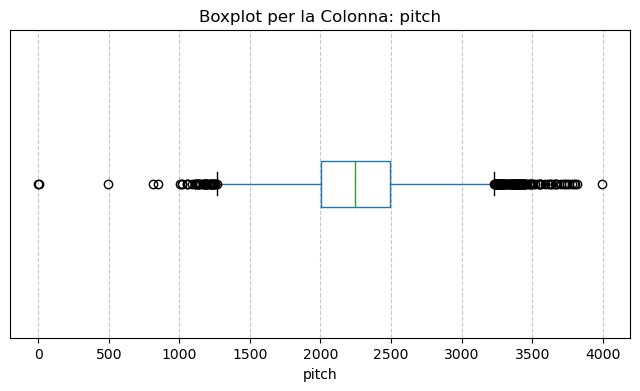

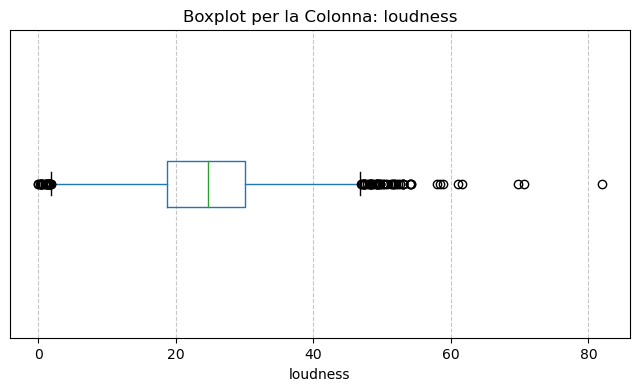

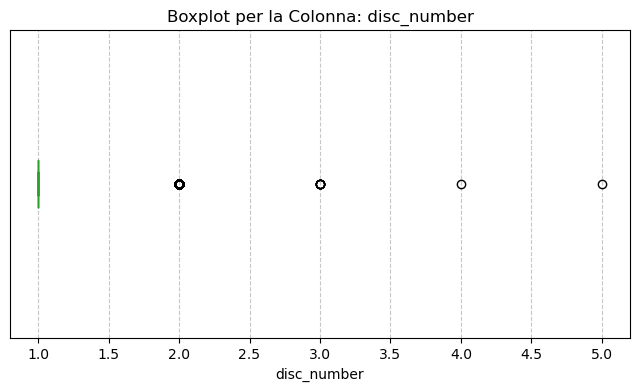

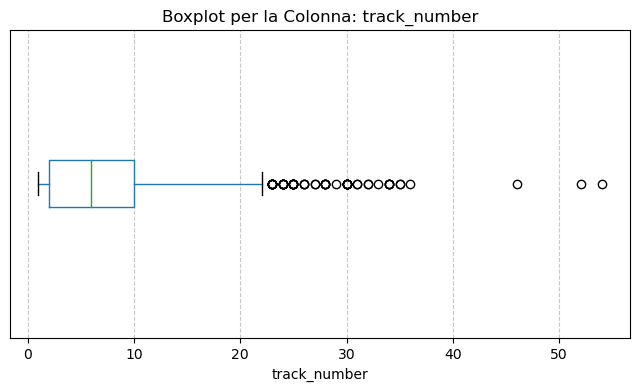

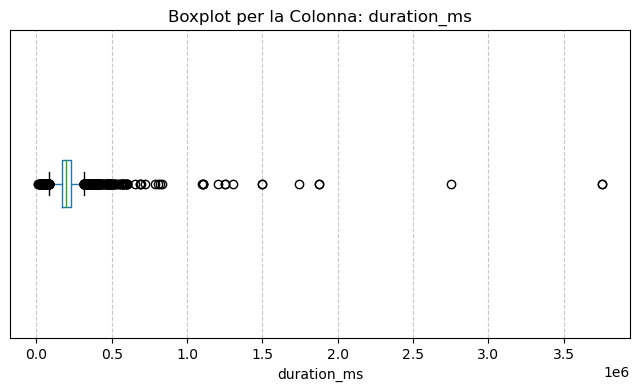

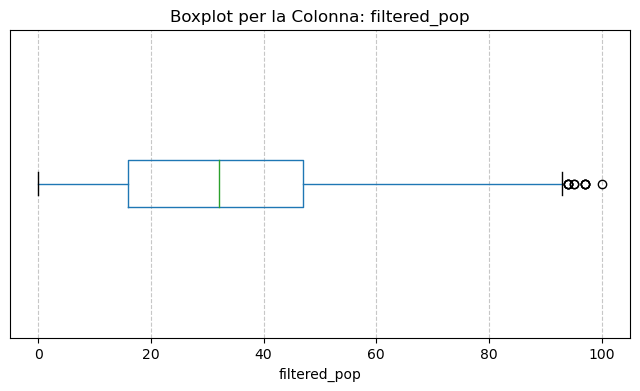

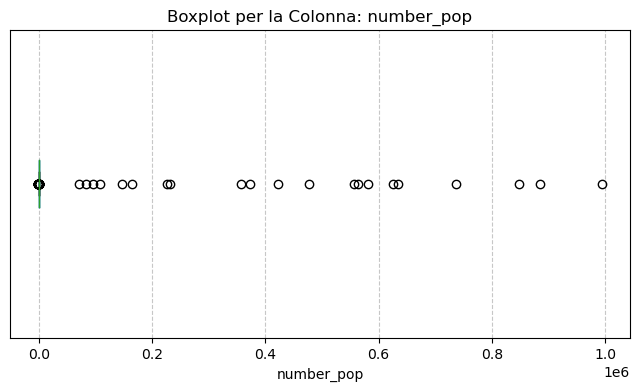

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seleziona solo le colonne numeriche
df_numeric = df_tracks.select_dtypes(include=np.number)

# Scorri ogni colonna numerica e crea un boxplot separato
for col in df_numeric.columns:
    
    # Crea un nuovo grafico per la colonna corrente
    plt.figure(figsize=(8, 4))
    
    # Genera il boxplot. L'argomento vert=False lo rende orizzontale, più facile da leggere
    df_numeric.boxplot(column=col, vert=False)
    
    # Personalizzazione
    plt.title(f"Boxplot per la Colonna: {col}")
    plt.xlabel(col)
    plt.yticks([]) # Nasconde l'etichetta dell'asse Y (che non serve in un boxplot singolo)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.show()

---

Language

Language column hghlight the principal language of each track. As it emerge from boxplot, the main language is italian and english but there are multiple single outliers that shows a moltitude of language used in italian rap songs. We chose to group all the languages having less than 10 occurrences in a macrocategory called "other".

In [ ]:
artists = 'dataset/artists.csv'
tracks = 'dataset/tracks.csv'

index_col = 0
df_artists = pd.read_csv(artists, sep=';', index_col=index_col)

df_tracks = pd.read_csv(tracks, index_col=index_col)

print(df_artists.head())
print(df_tracks.head())

                      name gender  birth_date birth_place nationality  \
id_author                                                               
ART82291002       99 posse      M         NaN         NaN         NaN   
ART53496045  achille lauro      M  1990-07-11      Verona      Italia   
ART18853907           alfa      M         NaN         NaN         NaN   
ART64265460      anna pepe      F         NaN         NaN         NaN   
ART75741740    articolo 31      M         NaN         NaN         NaN   

                                      description active_start  active_end  \
id_author                                                                    
ART82291002              gruppo musicale italiano   1991-01-01         NaN   
ART53496045  cantautore e rapper italiano (1990-)   2012-01-01         NaN   
ART18853907                                   NaN          NaN         NaN   
ART64265460                                   NaN          NaN         NaN   
ART75741740      gru

In [ ]:
df_tracks['language'] = df_tracks['language'].astype('category')
df_tracks['language'].value_counts()


language
it     9352
en      843
pl      588
es       63
co       48
pt       45
da       18
cs       14
fr       13
sr        9
nl        9
war       9
eu        8
no        6
ia        5
ca        5
gl        3
eo        2
la        2
de        2
sco       2
rm        2
et        1
ru        1
sw        1
sq        1
rw        1
cy        1
ro        1
qu        1
chr       1
mt        1
lt        1
bg        1
aa        1
Name: count, dtype: int64

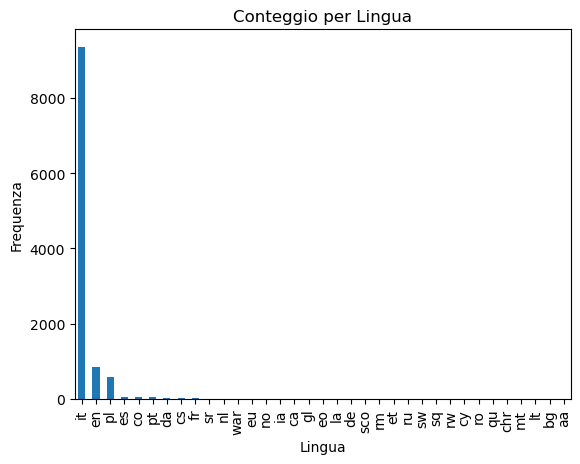

In [ ]:
counts = df_tracks['language'].value_counts()

counts.plot(kind='bar')

plt.title('Conteggio per Lingua')
plt.xlabel('Lingua')
plt.ylabel('Frequenza')

plt.show()

In [ ]:
language_counts = df_tracks['language'].value_counts()

lingue_da_raggruppare = language_counts[language_counts < 10].index

# Adding 'other' to possible categories
df_tracks['language'] = df_tracks['language'].cat.add_categories('other')


df_tracks.loc[df_tracks['language'].isin(lingue_da_raggruppare), 'language'] = 'other'

df_tracks['language'] = df_tracks['language'].cat.remove_unused_categories()

print("--- Final counts ---")
print(df_tracks['language'].value_counts())

--- Final counts ---
language
it       9352
en        843
pl        588
other      77
es         63
co         48
pt         45
da         18
cs         14
fr         13
Name: count, dtype: int64


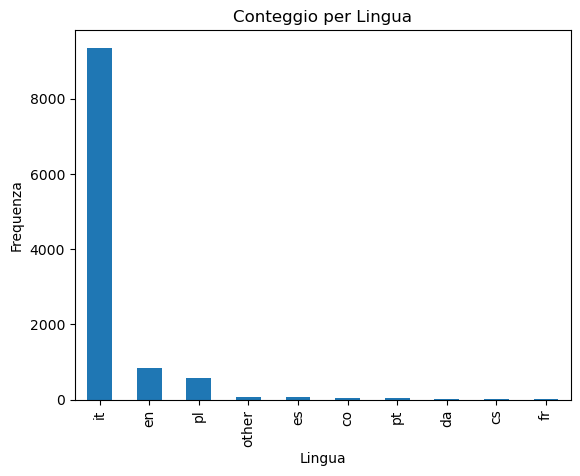

In [ ]:
counts = df_tracks['language'].value_counts()

counts.plot(kind='bar')

plt.title('Conteggio per Lingua')
plt.xlabel('Lingua')
plt.ylabel('Frequenza')

plt.show()

---

Id_album, Album and Album_name

The three columns : Id_album, Album and Album_name identify the album of every tracks. We studied the differences between them and what is the better indicator of such information.
Album has 9652 non null values, while album_name has 11088.

In [ ]:
df_albums = df_tracks[['id_album','album', 'album_name']]

In [ ]:
# Raggruppiamo per 'album_name' e contiamo gli ID unici
name_to_id_counts = df_albums.groupby('album_name')['id_album'].nunique()

# Filtriamo per trovare solo i nomi con più di 1 ID (i mismatch)
mismatches_name = name_to_id_counts[name_to_id_counts > 1]

print("--- Control 1: 'album_name' vs 'id_album' ---")
if mismatches_name.empty:
    print("No 'album_name' is associated to multiple ID.")
else:
    print(f"Found {len(mismatches_name)} 'album_name' with multiple IDs:")
    # .sort_values() ci mostra i peggiori in cima
    print(mismatches_name.sort_values(ascending=False))

print("-" * 50)

--- Controllo 1: 'album_name' vs 'id_album' ---
Found 337 'album_name' with multiple IDs:
album_name
SANTANA MONEY GANG               38
LA BELLAVITA                     20
Il mio lato peggiore             17
TUTTA VITA                       12
X2VR                              9
                                 ..
L'Angelo del Male                 2
L'Ultimo Testimone                2
L'erba cattiva (Gold Edition)     2
L'ora d'aria                      2
MILLE VOTE ANCORA                 2
Name: id_album, Length: 337, dtype: int64
--------------------------------------------------


In [ ]:
# Raggruppiamo per 'album' e contiamo gli ID unici
name_to_id_counts = df_albums.groupby('album')['id_album'].nunique()

mismatches_name = name_to_id_counts[name_to_id_counts > 1]

print("--- Control 2: 'album' vs 'id_album' ---")
if mismatches_name.empty:
    print("No 'album' is associated to multiple ID.")
else:
    print(f"Found {len(mismatches_name)} 'album' with multiple IDs:")
    # .sort_values() ci mostra i peggiori in cima
    print(mismatches_name.sort_values(ascending=False))

print("-" * 50)

--- Controllo 1: 'album' vs 'id_album' ---
Found 515 'album' with multiple IDs:
album
Rimo Da Quando                    33
Quello Che Vi Consiglio Vol. 2    23
Jolly Mixtape                     20
Aspetta Un Minuto Mixtape         19
Qualcosa Cambierà Mixtape         16
                                  ..
Paranoia Airlines                  2
Gelida Estate - EP                 2
Parole                             2
Pazienza                           2
#NONFOTTICONFDPMIXTAPE             2
Name: id_album, Length: 515, dtype: int64
--------------------------------------------------


As we can see the column "id_album" doesnt correctly match neither the column album or the column album name, we will revise such column as we did with asrtist_id, providing the same and unique id for each different album.

The focus now will switch on choosing the best column to represent "album" information and understand the main differences between album and album_name

In [ ]:
# 1. Filter: Keep rows where *BOTH* 'album' AND 'album_name' are not null
#    This is the key change: we pass a list of both columns to dropna()
df_valid_both = df_tracks.dropna(subset=['album', 'album_name'])

# 2. Calculate the matches
#    (df_valid_both['album'] == df_valid_both['album_name']) creates a True/False Series.
#    .sum() counts all the 'True' values.
matches = (df_valid_both['album'] == df_valid_both['album_name']).sum()

# 3. Calculate the mismatches
#    We do the same thing with '!=' (not equal to)
mismatches = (df_valid_both['album'] != df_valid_both['album_name']).sum()

# 4. Print the results
print("--- 'album' vs 'album_name' Analysis (only non-null in *both*) ---")
print(f"Total rows with valid 'album' AND 'album_name': {len(df_valid_both)}")
print(f"Matches (equal):     {matches}")
print(f"Mismatches (different): {mismatches}")

--- 'album' vs 'album_name' Analysis (only non-null in *both*) ---
Total rows with valid 'album' AND 'album_name': 9579
Matches (equal):     4081
Mismatches (different): 5498


Removed eventual missmatches caused by case sensitive titles and special char instances

In [ ]:
import re # Import the regular expressions library

def normalize_string(s):
    """
    1. Converts to string (if not already)
    2. Converts to lowercase
    3. Removes all punctuation (incl. brackets/parentheses themselves)
    4. Collapses multiple spaces into one
    5. Strips leading/trailing whitespace
    """
    s = str(s).lower()
    # This line removes punctuation like commas, periods, AND brackets/parens
    s = re.sub(r'[^\w\s]', '', s, flags=re.IGNORECASE) 
    # Collapse multiple spaces e.g., "Album  Name" -> "Album Name"
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# 1. Filter: Keep rows where *BOTH* 'album' AND 'album_name' are not null
df_valid_both = df_tracks.dropna(subset=['album', 'album_name']).copy()

# 2. Apply the normalization to *new* columns for comparison
df_valid_both['album_norm'] = df_valid_both['album'].apply(normalize_string)
df_valid_both['album_name_norm'] = df_valid_both['album_name'].apply(normalize_string)

# 3. Calculate matches using the NEW normalized columns
matches_norm = (df_valid_both['album_norm'] == df_valid_both['album_name_norm']).sum()

# 4. Calculate mismatches using the NEW normalized columns
mismatches_norm = (df_valid_both['album_norm'] != df_valid_both['album_name_norm']).sum()

# 5. Print the new results
print("--- 'album' vs 'album_name' Analysis (after NORMALIZATION) ---")
print(f"Total rows with valid 'album' AND 'album_name': {len(df_valid_both)}")
print(f"Normalized Matches (equal):     {matches_norm}")
print(f"Normalized Mismatches (different): {mismatches_norm}")

--- 'album' vs 'album_name' Analysis (after NORMALIZATION) ---
Total rows with valid 'album' AND 'album_name': 9579
Normalized Matches (equal):     5392
Normalized Mismatches (different): 4187


In [ ]:
# Create a DataFrame of *only* the newly fixed matches
df_fixed_matches = df_valid_both[
    (df_valid_both['album'] != df_valid_both['album_name']) &  # Condition 1: Mismatch before
    (df_valid_both['album_norm'] == df_valid_both['album_name_norm']) # Condition 2: Match after
]

# Print the header with the relevant columns
print(f"--- Examples of {len(df_fixed_matches)} Corrected Matches ---")
print(df_fixed_matches[[
    'album',           # Original 'album'
    'album_name',      # Original 'album_name'
    'album_norm',      # Normalized 'album'
    'album_name_norm'  # Normalized 'album_name'
]].head(10)) # Showing the first 10 examples

--- Examples of 1311 Corrected Matches ---
                                     album                        album_name  \
id                                                                             
TR957619       RED BULL 64 BARS, The Album       Red Bull 64 Bars, The Album   
TR812690                    Re Mida: Aurum                   Re Mida (Aurum)   
TR933715                    Re Mida: Aurum                   Re Mida (Aurum)   
TR213067       RED BULL 64 BARS, The Album       Red Bull 64 Bars, The Album   
TR216323                    Re Mida: Aurum                   Re Mida (Aurum)   
TR138549                    Re Mida: Aurum                   Re Mida (Aurum)   
TR624333                    Re Mida: Aurum                   Re Mida (Aurum)   
TR606025  BLOCCO 181 - ORIGINAL SOUNDTRACK  BLOCCO 181 – ORIGINAL SOUNDTRACK   
TR260830                            Gemini                            GEMINI   
TR441529                  Numero Zero - EP                    Numero zero ep 

Examining the miss match impact and the differences in the missmatched occurrences.

In [ ]:

# Filter: Keep rows where *BOTH* 'album' AND 'album_name' are not null
df_valid_both = df_tracks.dropna(subset=['album', 'album_name']).copy()

# Apply the normalization to *new* columns
df_valid_both['album_norm'] = df_valid_both['album'].apply(normalize_string)
df_valid_both['album_name_norm'] = df_valid_both['album_name'].apply(normalize_string)

# Filter the df_valid_both to find rows that *still* don't match after normalization
df_normalized_mismatches = df_valid_both[
    df_valid_both['album_norm'] != df_valid_both['album_name_norm']
]

print(f"--- Inspecting {len(df_normalized_mismatches)} Normalized Mismatches ---")

# Print the first 15 examples, focusing on all four columns
print(df_normalized_mismatches[[
    'album',           # Original 1
    'album_name',      # Original 2
    'album_norm',      # Normalized 1
    'album_name_norm'  # Normalized 2
]].head(15))

--- Inspecting 4187 Normalized Mismatches ---
                              album     album_name                album_norm  \
id                                                                             
TR480968          OKAY OKAY !! - EP    OKAY OKAY 2              okay okay ep   
TR585039           FOREVER AND EVER        FOREVER          forever and ever   
TR550335           FOREVER AND EVER        FOREVER          forever and ever   
TR170793           FOREVER AND EVER        FOREVER          forever and ever   
TR627195           FOREVER AND EVER        FOREVER          forever and ever   
TR628871   Festival di Sanremo 2023  MADE IN ITALY  festival di sanremo 2023   
TR700756           FOREVER AND EVER        FOREVER          forever and ever   
TR483404           FOREVER AND EVER        FOREVER          forever and ever   
TR497808           FOREVER AND EVER        FOREVER          forever and ever   
TR355495           FOREVER AND EVER        FOREVER          forever and ev

While the column album seems more reasonable and coherent, it contains multiple null values.
Some album in "album_name" appear truncated and incomplete.

We decided to keep the normalization for better readability and to have normalized occurrences.

To create a new correct version of the column showing the album relative to every tracks we decided to do 3 major choices:

    #Choice 1 (for null 'album'): Use 'album_name_norm',
    
    #Choice 2 (for Mismatch): Use 'album_norm',
    
    #Choice 3 (for Match): mantain 'album_norm' (the same with 'album_name_norm')

In [ ]:
import numpy as np # Import numpy for conditional logic
import re          # Ensure 're' is imported

# 1. Define the normalization function (just in case)
def normalize_string(s):
    s = str(s).lower()
    # Removes punctuation, parentheses, etc.
    s = re.sub(r'[^\w\s]', '', s, flags=re.IGNORECASE) 
    # Removes multiple spaces
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# 2. Apply normalization to the ENTIRE DataFrame
#    This creates the 'album_norm' and 'album_name_norm' columns
df_tracks['album_norm'] = df_tracks['album'].apply(normalize_string)
df_tracks['album_name_norm'] = df_tracks['album_name'].apply(normalize_string)


# 3. Define the conditions
conditions = [
    # Condition 1: 'album' is null.
    (df_tracks['album'].isnull()),
    
    # Condition 2: There is a Mismatch between normalized versions.
    (df_tracks['album_norm'] != df_tracks['album_name_norm']),
    
    # Condition 3: There is a Match (and 'album' is not null, already handled)
    (df_tracks['album_norm'] == df_tracks['album_name_norm'])
]

# 4. Define the corresponding choices for each condition
choices = [
    # Choice 1 (for null 'album'): Use 'album_name_norm' (as you requested)
    df_tracks['album_name_norm'],
    
    # Choice 2 (for Mismatch): Use 'album_norm' (as you requested)
    df_tracks['album_norm'],
    
    # Choice 3 (for Match): Use 'album_norm' (they are the same)
    df_tracks['album_norm']
]

# 5. Create the 'correct_album' column
#    np.select applies the 'choices' based on the 'conditions'.
#    'default=np.nan' handles any cases not covered (though there shouldn't be any here).
df_tracks['correct_album'] = np.select(conditions, choices, default=np.nan)

# 6. Verify the result
print("--- 'correct_album' creation complete ---")
print("Example of results:")

# Show the original columns and the final result for comparison
print(df_tracks[['album', 'album_name', 'correct_album']].head(10))

# Show the rows that were previously a "hard" mismatch
print("\n--- Checking the 'hard' mismatch cases (e.g., Sanremo) ---")
print(df_tracks[df_tracks['album'].str.contains('Sanremo 2023', na=False)][['album', 'album_name', 'correct_album']])

--- 'correct_album' creation complete ---
Example of results:
                              album        album_name  \
id                                                      
TR934808           FOREVER AND EVER  FOREVER AND EVER   
TR760029           FOREVER AND EVER  FOREVER AND EVER   
TR916821           FOREVER AND EVER  FOREVER AND EVER   
TR480968          OKAY OKAY !! - EP       OKAY OKAY 2   
TR585039           FOREVER AND EVER           FOREVER   
TR550335           FOREVER AND EVER           FOREVER   
TR170793           FOREVER AND EVER           FOREVER   
TR627195           FOREVER AND EVER           FOREVER   
TR628871   Festival di Sanremo 2023     MADE IN ITALY   
TR700756           FOREVER AND EVER           FOREVER   

                     correct_album  
id                                  
TR934808          forever and ever  
TR760029          forever and ever  
TR916821          forever and ever  
TR480968              okay okay ep  
TR585039          forever and e

How many unique values remained after the creation of the final album column

In [ ]:
unique = df_tracks['correct_album'].nunique()
unique1 = df_tracks['album'].nunique()
unique2 = df_tracks['album_name'].nunique()

print(unique, unique1, unique2)

1886 890 2421


In [ ]:
df_tracks['correct_album'].value_counts()

correct_album
santana money gang                                  66
rimo da quando                                      47
23 6451                                             37
taxi driver deluxe                                  37
solo un uomo gold edition                           36
                                                    ..
muziki                                               1
nullatenente feat massimo pericolo jake la furia     1
lamborghini swiss rmx feat pronto                    1
cani da sfida                                        1
status                                               1
Name: count, Length: 1886, dtype: int64

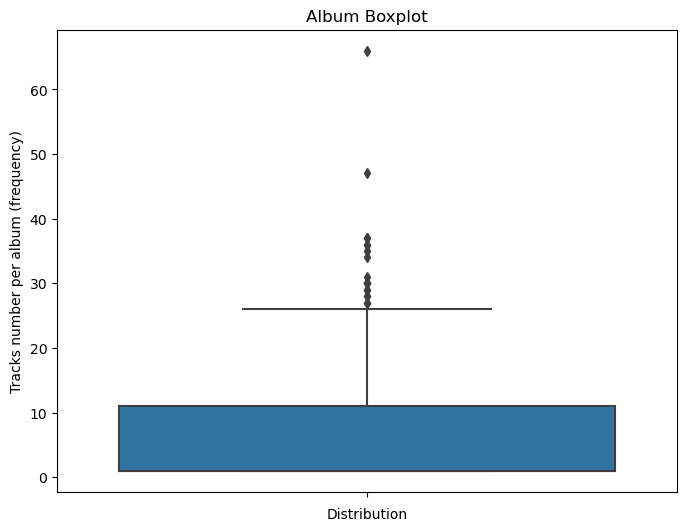

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = df_tracks['correct_album'].value_counts()
plt.figure(figsize=(8, 6))

sns.boxplot(y=counts)

plt.title('Album Boxplot')
plt.ylabel('Tracks number per album (frequency)')
plt.xlabel('Distribution')
plt.show()

In [ ]:
# Grouping for 'correct_album' and count unique IDs
df_albums = df_tracks[['id_album', 'correct_album']].drop_duplicates()
name_to_id_counts = df_albums.groupby('correct_album')['id_album'].nunique()

mismatches_name = name_to_id_counts[name_to_id_counts > 1]

print("--- Control 2: 'correct_album' vs 'id_album' ---")
if mismatches_name.empty:
    print("No 'correct_album' is associated to multiple ID.")
else:
    print(f"Found {len(mismatches_name)} 'correct_album' with multiple IDs:")
    print(mismatches_name.sort_values(ascending=False))

print("-" * 50)

--- Control 2: 'correct_album' vs 'id_album' ---
Found 594 'correct_album' with multiple IDs:
correct_album
rimo da quando                   33
quello che vi consiglio vol 2    23
jolly mixtape                    20
aspetta un minuto mixtape        19
santana money gang               17
                                 ..
dark boys club                    2
musica da serial killer           2
dasein sollen ep                  2
mr simpatia                       2
107 elementi                      2
Name: id_album, Length: 594, dtype: int64
--------------------------------------------------


Assigning right and unique ID for every album.

Created id_album_final: A new, unique identifier generated to enforce a strict one-to-one relationship with the correct_album column. This resolves the many-to-many inconsistencies present in the original id_album data.

In [ ]:
import pandas as pd
import numpy as np
import random

# --- PREP 1: Ottenere l'ordine di processamento ---
# Ordina gli album da quello con più tracce a quello con meno
# Questo dà priorità agli album più importanti
album_order = df_tracks['correct_album'].value_counts().index

# --- PREP 2: Creare la mappa dei candidati ---
# Calcoliamo la frequenza di ogni coppia (album, id)
# es. ['Greatest Hits', 'id_123'] -> 50 tracce
#     ['Greatest Hits', 'id_456'] -> 10 tracce
#     ['Best Of',       'id_123'] -> 5 tracce

# Filtriamo via i nulli, non ci servono come candidati
df_candidates = df_tracks.dropna(subset=['correct_album', 'id_album'])

track_counts = df_candidates.groupby(['correct_album', 'id_album']).size().to_frame('count')

# Ordiniamo per album e poi per frequenza (la più alta prima)
track_counts = track_counts.sort_values(['correct_album', 'count'], ascending=[True, False])

# Ora trasformiamo questo in un dizionario di liste (la nostra mappa dei candidati)
# es. {'Greatest Hits': ['id_123', 'id_456'], 'Best Of': ['id_123']}
all_id_candidates = track_counts.reset_index().groupby('correct_album')['id_album'].apply(list).to_dict()

print("Preparazione completata.")

Preparazione completata.


In [ ]:
# --- ESECUZIONE ---
# Insieme per tenere traccia degli ID che abbiamo già assegnato
used_ids = set()

# Dizionario per salvare la nostra mappatura finale e pulita
# es. {'Greatest Hits': 'id_123', 'Best Of': 'id_789_nuovo'}
final_album_to_id_map = {}

# Funzione per generare un nuovo ID (come da te richiesto)
def generate_new_id():
    # Crea un ID nel formato 'ALB' + 6 cifre
    new_id = f"ALB{random.randint(100000, 999999)}"
    # Assicuriamoci che non sia già stato usato (collisione molto improbabile)
    while new_id in used_ids:
        new_id = f"ALB{random.randint(100000, 999999)}"
    return new_id

print(f"Inizio processamento di {len(album_order)} album...")

# Iteriamo sugli album in ordine di importanza
for album_name in album_order:
    
    # Prendiamo la lista di ID candidati per questo album (ordinata per frequenza)
    candidate_ids = all_id_candidates.get(album_name, []) # .get() gestisce album senza candidati
    
    assigned_id = None # Flag per sapere se abbiamo trovato un ID

    # Regola 3 & 4: Cerchiamo il primo ID candidato che non è già stato usato
    for potential_id in candidate_ids:
        if potential_id not in used_ids:
            # Trovato! Assegniamo questo ID all'album
            assigned_id = potential_id
            used_ids.add(assigned_id) # Aggiungiamolo agli ID usati
            final_album_to_id_map[album_name] = assigned_id
            break # Usciamo dal loop dei candidati e passiamo all'album successivo
    
    # Regola 5: Se il loop finisce senza 'break', tutti i candidati erano già presi
    # (o la lista 'candidate_ids' era vuota)
    if assigned_id is None:
        # Creiamo un nuovo ID ad hoc
        new_id = generate_new_id()
        used_ids.add(new_id) # Aggiungiamolo agli ID usati
        final_album_to_id_map[album_name] = new_id

print("Processamento terminato. Mappa 1-a-1 creata.")   

Inizio processamento di 1886 album...
Processamento terminato. Mappa 1-a-1 creata.


In [ ]:
# --- APPLICAZIONE ---
# Usiamo .map() per applicare il nostro dizionario pulito
df_tracks['id_album_final'] = df_tracks['correct_album'].map(final_album_to_id_map)

print("\n--- Applicazione completata ---")
print(df_tracks[['correct_album', 'id_album_final']].head())

# --- VERIFICA FINALE ---
# Ora, se controlliamo, ogni album avrà 1 solo ID e ogni ID 1 solo album
check_ids_per_album = df_tracks.groupby('correct_album')['id_album_final'].nunique()
check_albums_per_id = df_tracks.groupby('id_album_final')['correct_album'].nunique()

print(f"\nAlbum con più di 1 ID: {(check_ids_per_album > 1).sum()}")
print(f"ID con più di 1 Album: {(check_albums_per_id > 1).sum()}")


--- Applicazione completata ---
             correct_album id_album_final
id                                       
TR934808  forever and ever      ALB436151
TR760029  forever and ever      ALB436151
TR916821  forever and ever      ALB436151
TR480968      okay okay ep      ALB270182
TR585039  forever and ever      ALB436151

Album con più di 1 ID: 0
ID con più di 1 Album: 0


Cella per compilare direttamente df con correct_album e id_final_album

In [ ]:
import pandas as pd
import numpy as np
import re
import random

print("--- [FASE 1]: Definizione della Funzione di Normalizzazione ---")

def normalize_string(s):
    """
    1. Converte in stringa e minuscolo.
    2. Rimuove punteggiatura e caratteri speciali.
    3. Rimuove spazi extra.
    """
    s = str(s).lower()
    s = re.sub(r'[^\w\s]', '', s, flags=re.IGNORECASE) 
    s = re.sub(r'\s+', ' ', s).strip()
    return s

print("--- [FASE 2]: Creazione di 'correct_album' ---")

# Applica la normalizzazione alle due colonne originali
df_tracks['album_norm'] = df_tracks['album'].apply(normalize_string)
df_tracks['album_name_norm'] = df_tracks['album_name'].apply(normalize_string)

# Definisci le condizioni per la colonna 'correct_album'
conditions = [
    (df_tracks['album'].isnull()), # Priorità 1: Se 'album' è nullo...
    (df_tracks['album_norm'] != df_tracks['album_name_norm']), # Priorità 2: Se c'è mismatch...
    (df_tracks['album_norm'] == df_tracks['album_name_norm'])  # Priorità 3: Se c'è match...
]

# Definisci le scelte corrispondenti
choices = [
    df_tracks['album_name_norm'], # ...usa 'album_name_norm'
    df_tracks['album_norm'],      # ...usa 'album_norm'
    df_tracks['album_norm']       # ...usa 'album_norm'
]

# Crea la colonna 'correct_album'
df_tracks['correct_album'] = np.select(conditions, choices, default=np.nan)
print("Colonna 'correct_album' creata con successo.")


print("\n--- [FASE 3]: Assegnazione di 'id_album_final' (Algoritmo 1-a-1) ---")

# --- 3.1: Preparazione ---

# Ordina gli album per frequenza (dà priorità agli album più grandi)
album_order = df_tracks['correct_album'].value_counts().index

# Filtra i dati per creare la mappa dei candidati
df_candidates = df_tracks.dropna(subset=['correct_album', 'id_album'])
track_counts = df_candidates.groupby(['correct_album', 'id_album']).size().to_frame('count')

# Ordina i candidati per album e poi per frequenza
track_counts = track_counts.sort_values(['correct_album', 'count'], ascending=[True, False])

# Crea un dizionario di liste di candidati: {'Album': ['id_più_freq', 'id_secondo_più_freq']}
all_id_candidates = track_counts.reset_index().groupby('correct_album')['id_album'].apply(list).to_dict()

# --- 3.2: Esecuzione del Loop ---

used_ids = set() # Set per gli ID già "presi"
final_album_to_id_map = {} # La nostra mappa pulita finale

def generate_new_id():
    new_id = f"ALB{random.randint(100000, 999999)}"
    while new_id in used_ids:
        new_id = f"ALB{random.randint(100000, 999999)}"
    return new_id

print(f"Inizio processamento di {len(album_order)} album per assegnazione ID...")

# Itera sugli album in ordine di priorità
for album_name in album_order:
    
    candidate_ids = all_id_candidates.get(album_name, []) # Lista di ID candidati
    assigned_id = None # Flag

    # Cerca il primo ID valido (non già usato)
    for potential_id in candidate_ids:
        if potential_id not in used_ids:
            assigned_id = potential_id
            used_ids.add(assigned_id) # "Prenota" l'ID
            final_album_to_id_map[album_name] = assigned_id
            break # Passa all'album successivo
    
    # Se non è stato trovato nessun ID valido (o non c'erano candidati)
    if assigned_id is None:
        new_id = generate_new_id()
        used_ids.add(new_id)
        final_album_to_id_map[album_name] = new_id

print("Processamento ID terminato. Mappa 1-a-1 creata.")

# --- 3.3: Applicazione Finale ---

# Applica la mappa pulita al DataFrame
df_tracks['id_album_final'] = df_tracks['correct_album'].map(final_album_to_id_map)

print("\n--- [FASE 4]: VERIFICA FINALE ---")

# Controlla la relazione 1-a-1
check_ids_per_album = df_tracks.groupby('correct_album')['id_album_final'].nunique()
check_albums_per_id = df_tracks.groupby('id_album_final')['correct_album'].nunique()

print(f"Album con più di 1 ID: {(check_ids_per_album > 1).sum()}")
print(f"ID con più di 1 Album: {(check_albums_per_id > 1).sum()}")

print("\n--- Esempio di 10 righe pulite: ---")
print(df_tracks[['correct_album', 'id_album', 'id_album_final']].sample(10))

--- [FASE 1]: Definizione della Funzione di Normalizzazione ---
--- [FASE 2]: Creazione di 'correct_album' ---
Colonna 'correct_album' creata con successo.

--- [FASE 3]: Assegnazione di 'id_album_final' (Algoritmo 1-a-1) ---
Inizio processamento di 1886 album per assegnazione ID...
Processamento ID terminato. Mappa 1-a-1 creata.

--- [FASE 4]: VERIFICA FINALE ---
Album con più di 1 ID: 0
ID con più di 1 Album: 0

--- Esempio di 10 righe pulite: ---
                                  correct_album   id_album id_album_final
id                                                                       
TR990125                      sindrome di toret  ALB262327      ALB262327
TR118387                               mm vol 1  ALB689926      ALB689926
TR317855                santeria voodoo edition  ALB667084      ALB667084
TR705460            e vissero feriti e contenti  ALB577485      ALB577485
TR480533                        full metal dark  ALB666017      ALB666017
TR687734                   c

---

Album release date study

In [ ]:

# --- 2. Esecuzione del Merge (Join) ---

# Left Join: Mantiene tutte le righe di df_tracks
df_tracks_start = df_tracks.join(
    df_artists,                 # DataFrame di sinistra (tracks, tutte le righe mantenute)
    on='id_artist'              # Colonna chiave nel DataFrame di sinistra (df_tracks)
)

In [ ]:
import pandas as pd
import numpy as np

# 1. Assicurati che le colonne siano in formato datetime (ripetuto per sicurezza)
df_tracks_start['active_start'] = pd.to_datetime(
    df_tracks_start['active_start'], errors='coerce'
)
df_tracks_start['album_release_date'] = pd.to_datetime(
    df_tracks_start['album_release_date'], errors='coerce'
)

# 2. Crea la condizione di "NON OK"
# Vogliamo i record dove l'active_start è SUCCESSIVA alla data di rilascio.
condizione_non_rispettata = (
    (df_tracks_start['active_start'] > df_tracks_start['album_release_date']) |
    (df_tracks_start['album_release_date'] > '2026-01-01')
)

# 3. Applica il filtro e stampa
record_non_rispettati = df_tracks_start[condizione_non_rispettata]

print("--- Tracce in cui l'artista NON era attivo al rilascio (active_start > album_release_date) ---")
print(f"Numero di record con questa incoerenza: {len(record_non_rispettati)}")

# Stampa le colonne chiave per l'analisi
print(record_non_rispettati[['title', 'active_start', 'album_release_date']].head(10))


--- Tracce in cui l'artista NON era attivo al rilascio (active_start > album_release_date) ---
Numero di record con questa incoerenza: 57
                                          title active_start  \
id                                                             
TR292829                               I’m dead   2015-01-01   
TR842844                        Keep on driving   2015-01-01   
TR264304                   One Take FM Free Mic   2015-01-01   
TR460325      ​no chance mai (no champagne rmx)   2015-01-01   
TR525648                        Dulcis in Fundo   2015-01-01   
TR936795  Sbsm try not to cry challenge version   2015-01-01   
TR505501                           The Exchange   2012-01-01   
TR348515                               Maradona   2012-01-01   
TR335051                 Vince Carter Freestyle   2012-01-01   
TR122231                                Why Not   2012-01-01   

         album_release_date  
id                           
TR292829         2007-03-13  
TR8

In [ ]:
# --- 1. Definisci il nome corretto della colonna album ---
album_id_column = 'correct_album'

# --- 2. Calcola la moda (data più frequente) per OGNI album ---
print(f"Calcolo la moda di 'album_release_date' raggruppando per '{album_id_column}'...")

# Usiamo transform() per creare una nuova colonna 'album_release_date_mode'
# Questa colonna avrà, per ogni traccia, la moda del suo album.
album_date_mode = df_tracks_start.groupby(album_id_column)['album_release_date'].transform(
    lambda x: x.mode()[0] if not x.mode().empty else pd.NaT
)
df_tracks_start['album_release_date_mode'] = album_date_mode

# --- 3. Definisci la condizione di aggiornamento ---
# Vogliamo aggiornare TUTTE le canzoni di un album se la moda di quell'album
# è "valida" (non è NaT) E è successiva all'inizio dell'attività dell'artista.
condizione_aggiornamento = (
    (df_tracks_start['album_release_date_mode'].notna()) &
    (df_tracks_start['album_release_date_mode'] > df_tracks_start['active_start'])
)

# --- 4. Applica l'aggiornamento ---
# Contiamo quante tracce verranno standardizzate
num_tracce_aggiornate = condizione_aggiornamento.sum()
print(f"Verranno aggiornate {num_tracce_aggiornate} tracce per standardizzare la data all'interno dei loro album.")

# Usiamo np.where:
# Se la condizione è VERA -> usa la moda dell'album
# Se la condizione è FALSA -> tieni la data originale della traccia
df_tracks_start['album_release_date'] = np.where(
    condizione_aggiornamento,
    df_tracks_start['album_release_date_mode'], # Valore se VERO
    df_tracks_start['album_release_date']       # Valore se FALSO
)

# --- 5. Pulizia ---
# Rimuoviamo la colonna temporanea che non serve più
df_tracks_start.drop(columns=['album_release_date_mode'], inplace=True)

print("Correzione e standardizzazione completata.")

Calcolo la moda di 'album_release_date' raggruppando per 'correct_album'...
Verranno aggiornate 6393 tracce per standardizzare la data all'interno dei loro album.
Correzione e standardizzazione completata.


In [ ]:
# --- 🔍 VERIFICA FINALE ---

print("\n--- Verifica DOPO la correzione ---")

# 1. Assicurati che le colonne siano in formato datetime (per sicurezza)
df_tracks_start['active_start'] = pd.to_datetime(
    df_tracks_start['active_start'], errors='coerce'
)
df_tracks_start['album_release_date'] = pd.to_datetime(
    df_tracks_start['album_release_date'], errors='coerce'
)

# 2. Crea la stessa condizione di "NON OK"
condizione_non_rispettata = (
    (df_tracks_start['active_start'] > df_tracks_start['album_release_date']) |
    (df_tracks_start['album_release_date'] > '2026-01-01')
)

# 3. Applica il filtro e stampa
record_non_rispettati_dopo = df_tracks_start[condizione_non_rispettata]

print(f"Numero di record con incoerenza DOPO la correzione: {len(record_non_rispettati_dopo)}")

# Stampa le colonne chiave per l'analisi
print(record_non_rispettati_dopo[['title', 'correct_album', 'active_start', 'album_release_date']].head(10))


--- Verifica DOPO la correzione ---
Numero di record con incoerenza DOPO la correzione: 30
                                          title  \
id                                                
TR264304                   One Take FM Free Mic   
TR460325      ​no chance mai (no champagne rmx)   
TR525648                        Dulcis in Fundo   
TR936795  Sbsm try not to cry challenge version   
TR505501                           The Exchange   
TR335051                 Vince Carter Freestyle   
TR757852                             Erbavoglio   
TR400694                        Stop That Train   
TR816045                  91  (#FuckYouGhali 3)   
TR917489                 Porca Madame Freestyle   

                          correct_album active_start album_release_date  
id                                                                       
TR264304  one take fm free mic season 6   2015-01-01         2008-06-17  
TR460325                             la   2015-01-01         2014-11-29  

In [ ]:
# --- 1. Definisci la condizione ESATTA dei record problematici ---
# Ci concentriamo solo sui casi in cui l'inizio attività è DOPO la data di rilascio
condizione_da_correggere = (
    (df_tracks_start['active_start'].notna()) &
    (df_tracks_start['album_release_date'].notna()) &
    (df_tracks_start['active_start'] > df_tracks_start['album_release_date'])
)

# --- 2. Controlla quanti record stiamo per correggere ---
num_da_correggere = condizione_da_correggere.sum()
print(f"Trovati {num_da_correggere} record con 'active_start > album_release_date'.")

# --- 3. Applica la correzione usando .loc ---
# Imposta 'album_release_date' = 'active_start' per queste righe
df_tracks_start.loc[condizione_da_correggere, 'album_release_date'] = \
    df_tracks_start.loc[condizione_da_correggere, 'active_start']

print(f"Corretti {num_da_correggere} record impostando 'album_release_date = active_start'.")

Trovati 30 record con 'active_start > album_release_date'.
Corretti 30 record impostando 'album_release_date = active_start'.


In [ ]:
# --- 🔍 VERIFICA FINALE ---

print("\n--- Verifica DOPO la correzione forzata ---")

# 1. Assicurati che le colonne siano in formato datetime
df_tracks_start['active_start'] = pd.to_datetime(df_tracks_start['active_start'], errors='coerce')
df_tracks_start['album_release_date'] = pd.to_datetime(df_tracks_start['album_release_date'], errors='coerce')

# 2. Crea la condizione di "NON OK"
condizione_non_rispettata = (
    (df_tracks_start['active_start'] > df_tracks_start['album_release_date']) |
    (df_tracks_start['album_release_date'] > '2026-01-01')
)

# 3. Applica il filtro e stampa
record_non_rispettati_finali = df_tracks_start[condizione_non_rispettata]

print(f"Numero di record con incoerenza DOPO la correzione: {len(record_non_rispettati_finali)}")
print(record_non_rispettati_finali[['title', 'correct_album', 'active_start', 'album_release_date']].head(10))


--- Verifica DOPO la correzione forzata ---
Numero di record con incoerenza DOPO la correzione: 0
Empty DataFrame
Columns: [title, correct_album, active_start, album_release_date]
Index: []
